In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Look

In [2]:
app_df = pd.read_csv('application_data.csv')
prev_df = pd.read_csv('previous_application.csv')

app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# view columns of application record data
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
app_df.shape

(307511, 122)

In [5]:
# Overview of dataset
# verbose: indicates whether to print the full summary of the DataFrame or not
app_df.info(show_counts=True, verbose=True)

# Here we can see that there are lot of columns that have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
# Percentage of null values in each column
((app_df.isnull().sum() / len(app_df))*100).sort_values(ascending=False).to_frame()

# Here we can see that many columns have more than 50% null values 
# Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant

,0
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
...,...
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_INCOME_TYPE,0.000000


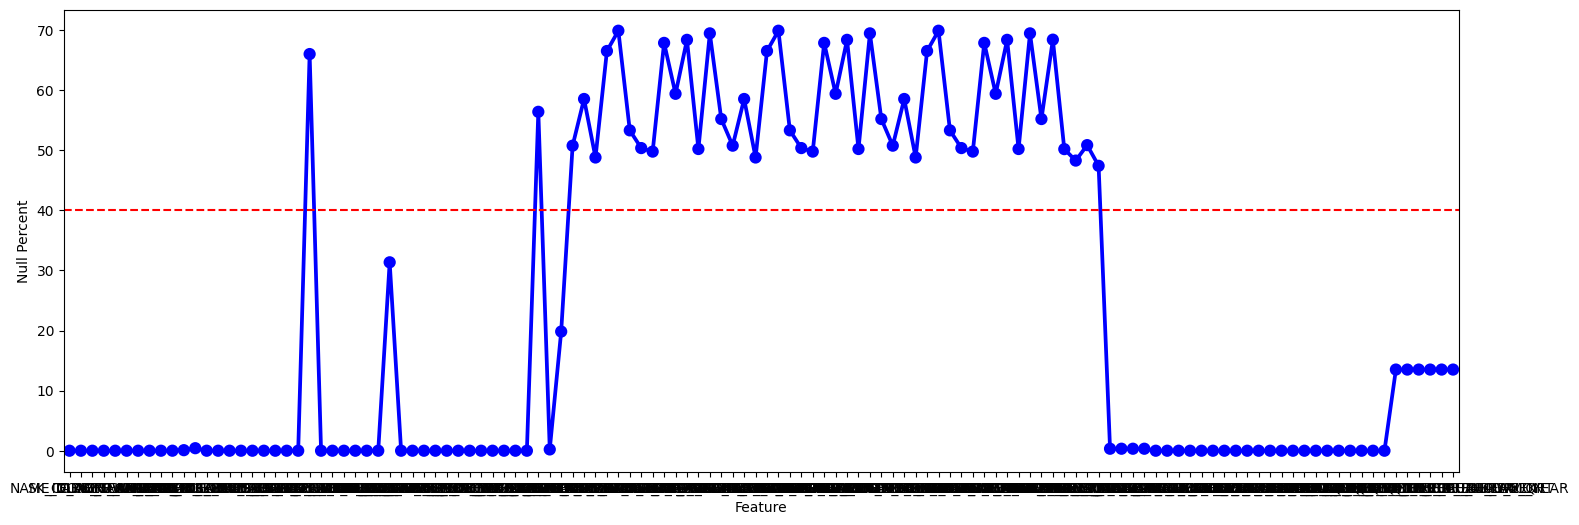

In [7]:
# getting the null percentage of columns and storing to new df
# resetting its index to remove column names as indecies
null_appdf = pd.DataFrame((app_df.isnull().sum() / len(app_df))*100).reset_index()

# setting column names
null_appdf.columns=["Feature","Null Percent"]
plt.figure(figsize=(18,6))
ax = sns.pointplot(data=null_appdf,x="Feature",y="Null Percent", color="blue")
ax.axhline(40, ls="--", color="red")
plt.show()

In [8]:
# From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line 
# and the columns which have less than 40 % null values below the red line.

In [9]:
null_appdf40 = null_appdf[null_appdf["Null Percent"]>=40.0]
null_appdf40

,Feature,Null Percent
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [10]:
# Total of 49 columns are there which have more than 40% null values.
# Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant

# Delete unneccessary columns that do not contribute to predict target

In [11]:
# 1. Columns for EXT_SOURCE
# these columns are for showing normalized score of external data source
# First we'll find the correlation cofficient with Target column to see whether
# it has any relation with target or not

In [12]:
ext_corrdf = app_df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
ext_corr = ext_corrdf.corr()
ext_corr

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_1,1.000000,0.213982,0.186846,-0.155317
EXT_SOURCE_2,0.213982,1.000000,0.109167,-0.160472
EXT_SOURCE_3,0.186846,0.109167,1.000000,-0.178919
TARGET,-0.155317,-0.160472,-0.178919,1.000000


<AxesSubplot: >

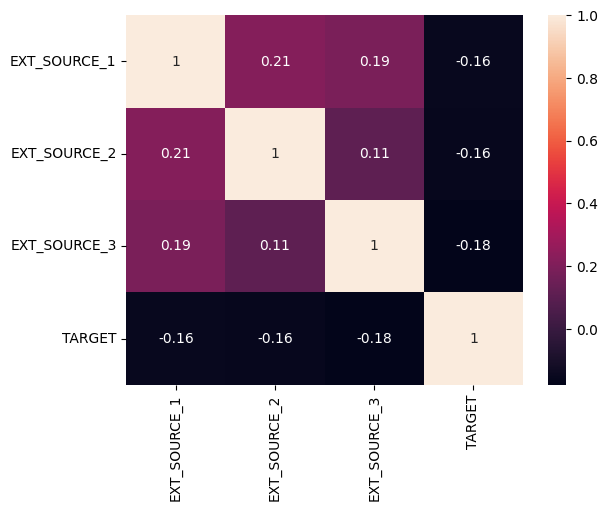

In [13]:
# Plot the heatmap for correlation for better visualization
sns.heatmap(ext_corr, xticklabels=ext_corr.columns, yticklabels=ext_corr.columns,annot=True)

In [14]:
# Here we can see that none of the three columns are contributing much in predticting the target
# the coeff of corr is negative and close to zero that means they have weal negative correlation
# Also, EXT_1 has more than50% null values and EXT_3 has more than 20% null values
# This implies that these columns are not neccessary for analysis

In [15]:
# create a list of columns that needs to be dropped 
# including the columns with >40% null values

unnecessary_cols = null_appdf40["Feature"].to_list() + ['EXT_SOURCE_2','EXT_SOURCE_3']
# EXT_SOURCE_1 is already there in null_appdf40

len(unnecessary_cols)

51

In [16]:
# 2. Columns for FLAG_DOC
# These 20 columns provide the status whether the applicant has provided the required doc or not
# First we'll find the count of Loa default and Loan repaid status based on FLAG_DOC status
# And check on submission of which document there are less/more chances of loan default

In [17]:
import itertools

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\2460475138.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_countdf["TARGET"] = flag_countdf["TARGET"].replace({1:"Defaulter",0:"Repayer"})


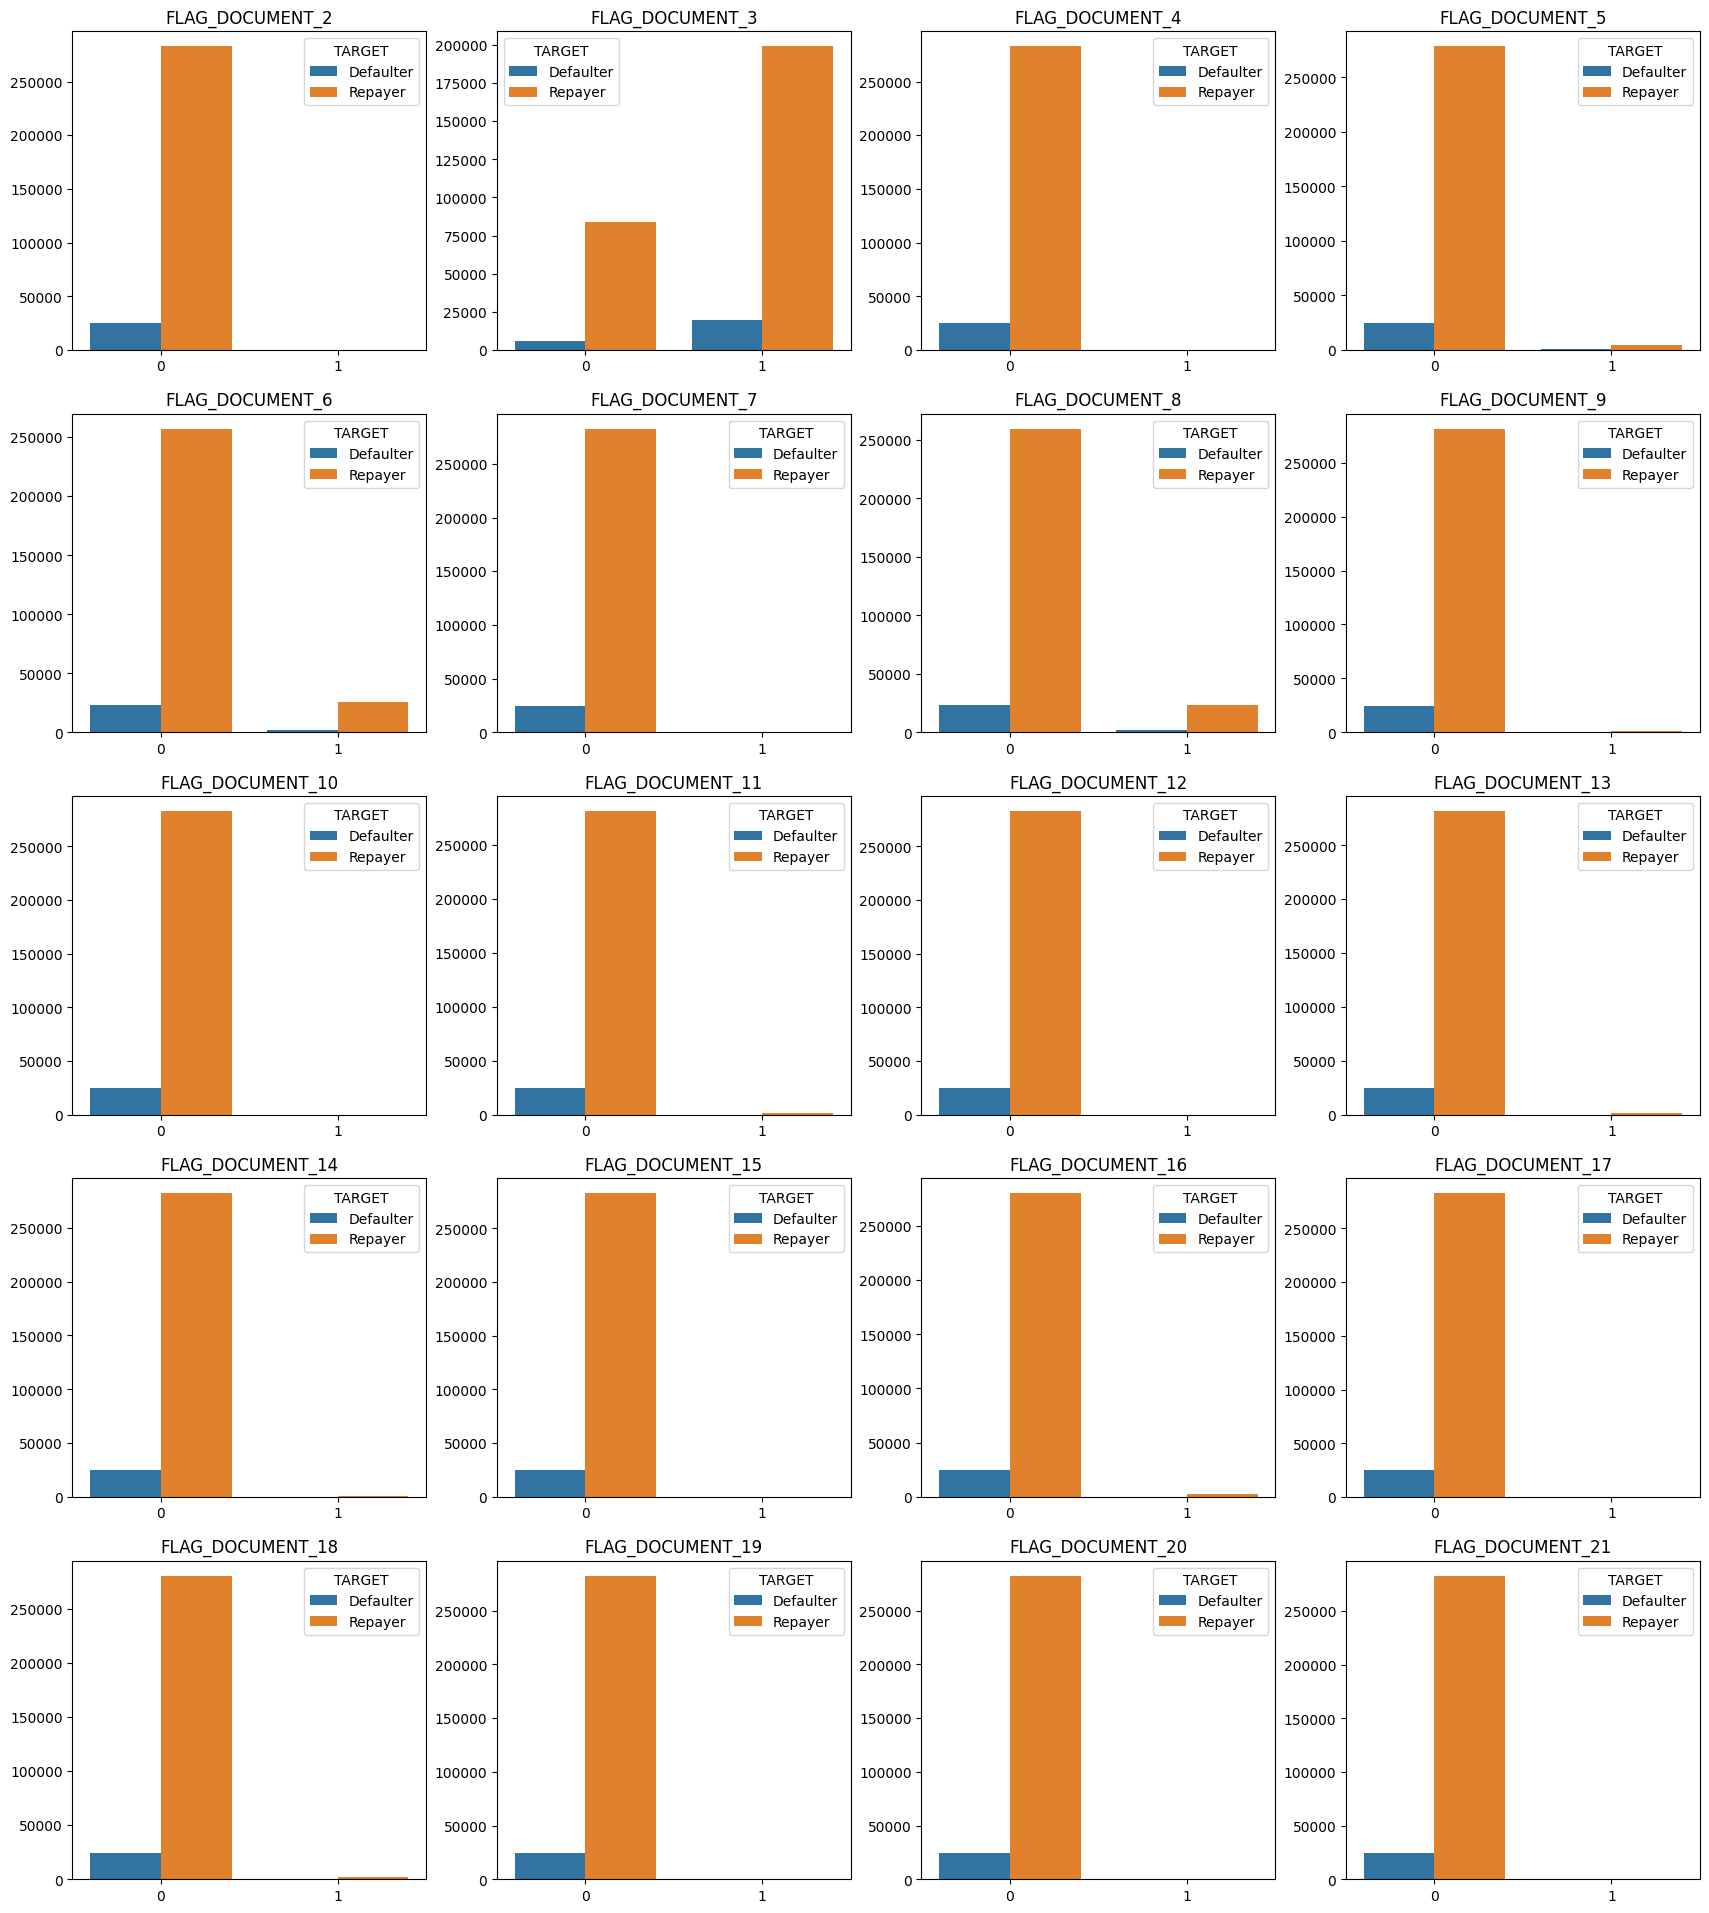

In [18]:
flag_countdf = app_df[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TARGET']]

flag_dfcols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

flag_countdf["TARGET"] = flag_countdf["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_dfcols, range(len(flag_dfcols))):
    plt.subplot(5,4,j+1)
    sns.countplot(x=flag_countdf[i], hue=flag_countdf['TARGET'])
    # plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [19]:
# From the above count plots we can see that most of applicants who submitted DOC3 has repaid the loan amount
# This means DOC3 can be a deciding factor for target
# all other columns show similar outcomes that most of the applicants (all most all of them) have not submitted the DOC_X
# So, we can delete those columns

In [20]:
flag_dfcols.remove('FLAG_DOCUMENT_3')
unnecessary_cols = unnecessary_cols + flag_dfcols
len(unnecessary_cols)

70

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\2924713419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contact_df["TARGET"] = contact_df["TARGET"].replace({1:"Defaulter",0:"Repayer"})


ValueError: num must be 1 <= num <= 6, not 7

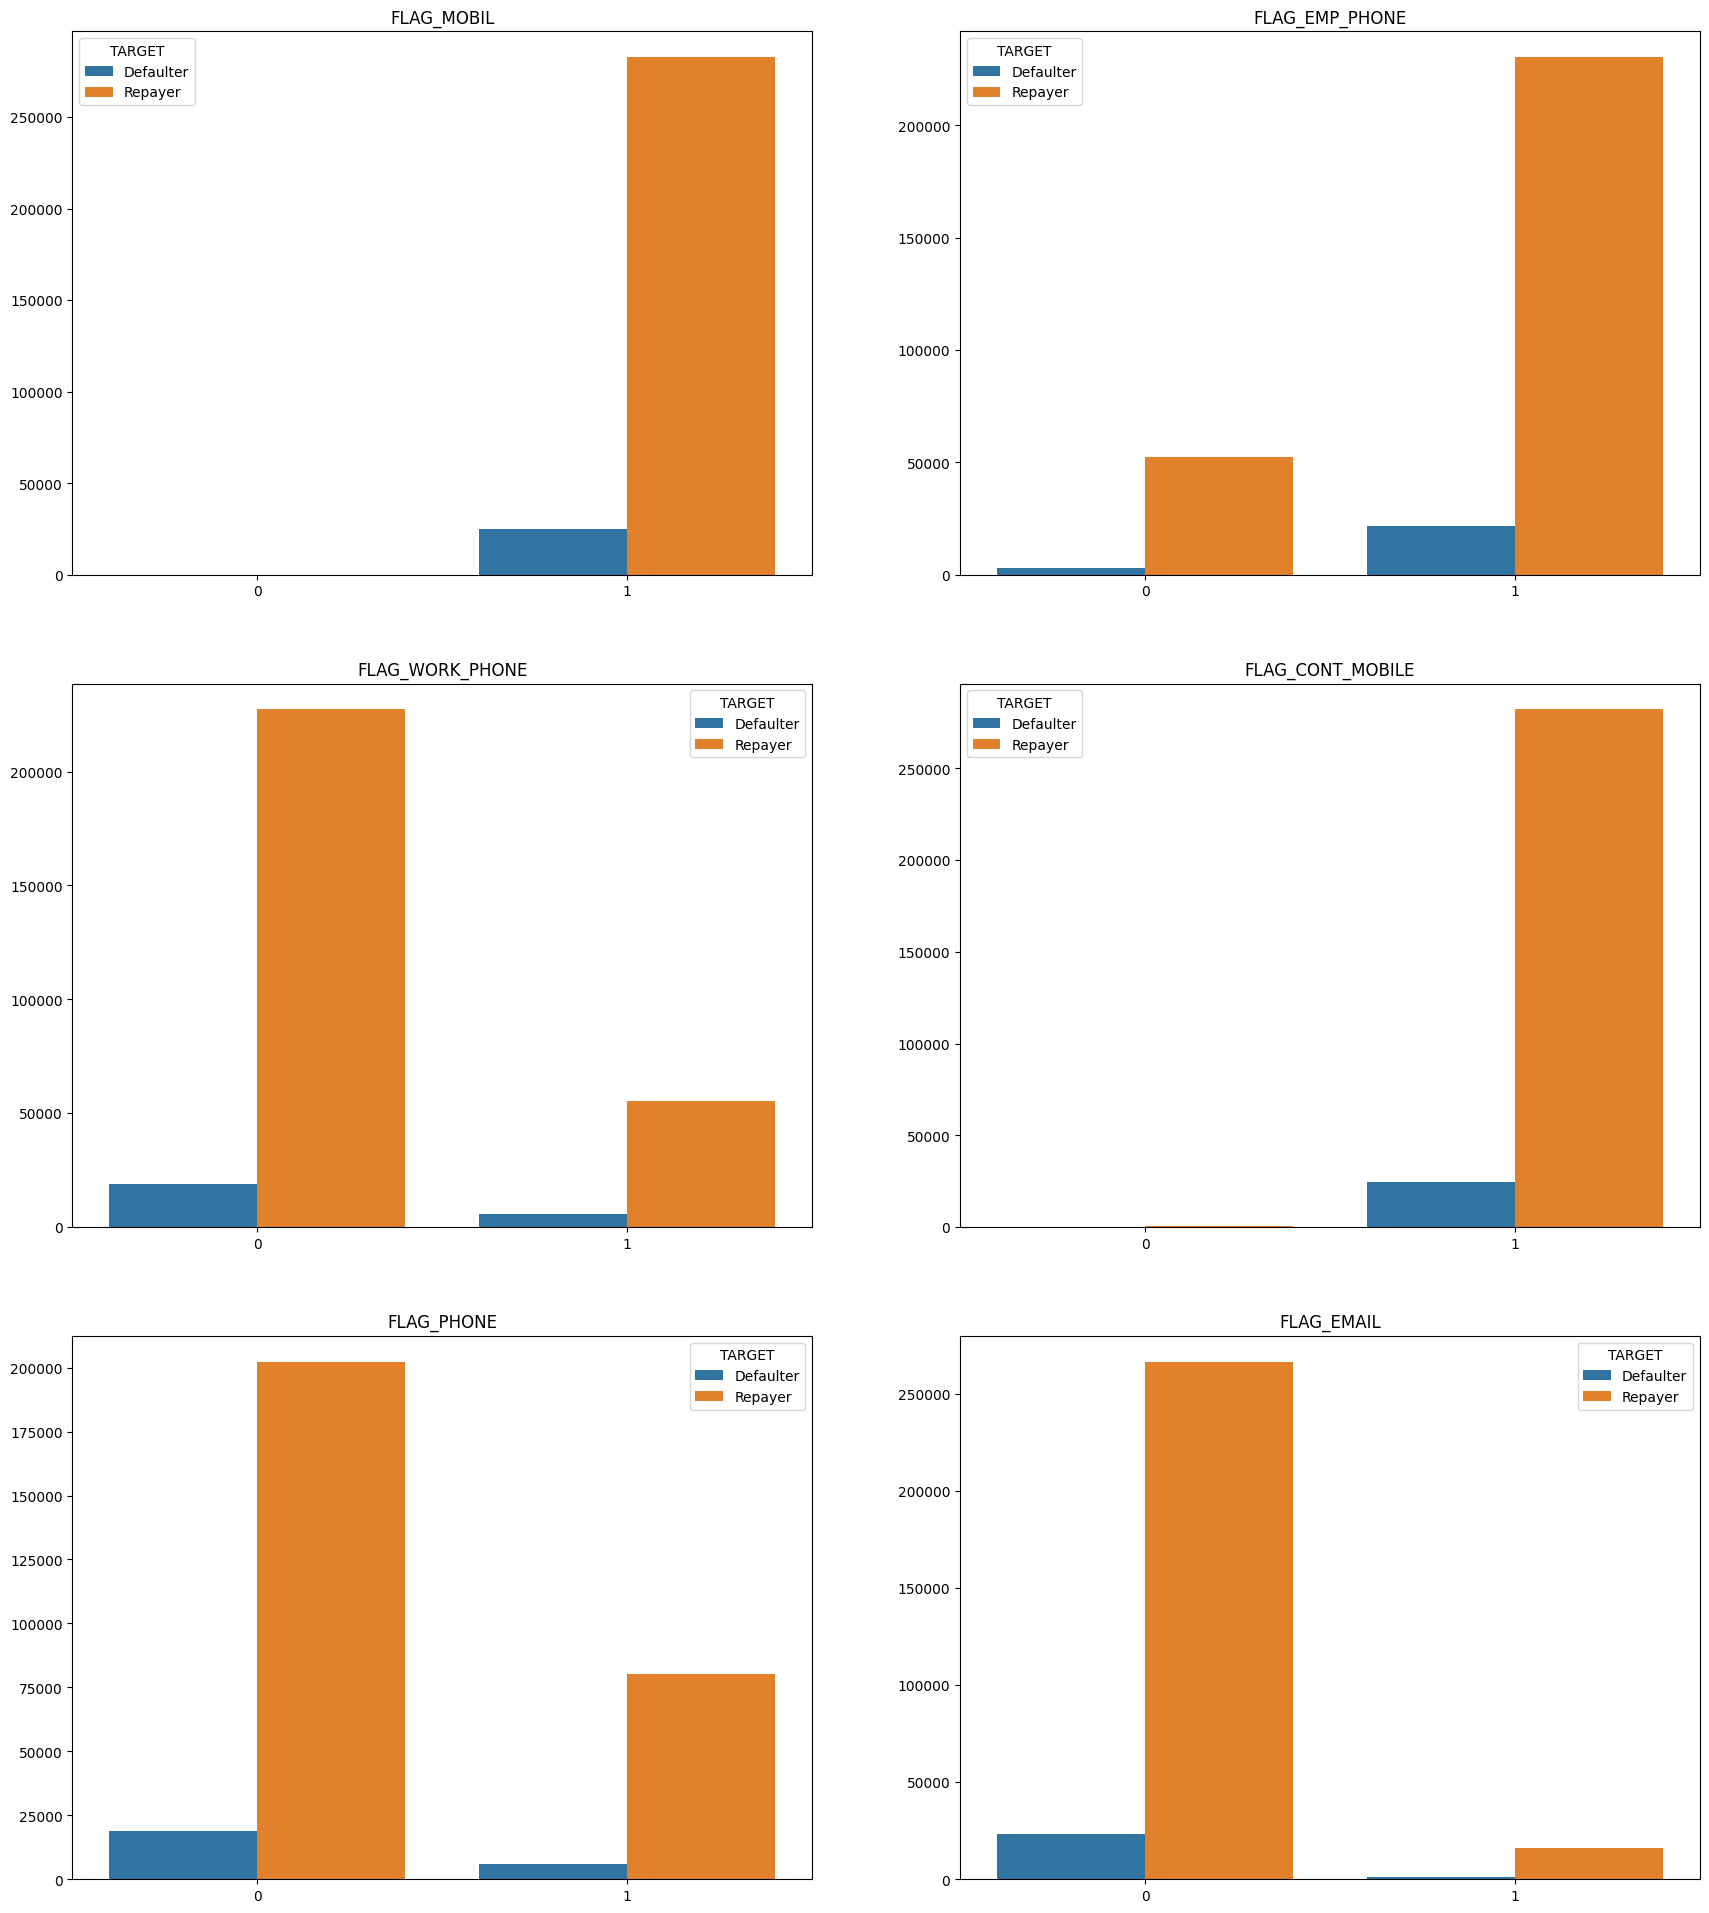

In [21]:
# 3. Columns for Contact details
# First we will check the countplots for these columns
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
contact_df = app_df[contact_col + ['TARGET']]

contact_df["TARGET"] = contact_df["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(contact_col, range(len(contact_df.columns))):
    plt.subplot(3,2,j+1)
    sns.countplot(x=contact_df[i], hue=contact_df['TARGET'])
    # plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [22]:
# there are variations in counts for each column 
# most of the applicants haven't submitted work phone
# among those who have submitted empphone, mobile and phone, most of them have 
# repaid the loan amount
# but same people who haven't submitted work phone, phone, email have also repid the loan amount

# So, to analyzee further for strong evidence of relation we find correlation matrix

In [23]:
contact_corr = app_df[contact_col + ['TARGET']].corr()
contact_corr

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_MOBIL,1.000000,-0.000845,0.000900,-0.000078,0.001128,0.000442,0.000534
FLAG_EMP_PHONE,-0.000845,1.000000,0.233801,-0.012819,-0.016131,0.062542,0.045982
FLAG_WORK_PHONE,0.000900,0.233801,1.000000,0.021580,0.293105,-0.011520,0.028524
FLAG_CONT_MOBILE,-0.000078,-0.012819,0.021580,1.000000,0.006257,-0.005356,0.000370
FLAG_PHONE,0.001128,-0.016131,0.293105,0.006257,1.000000,0.014657,-0.023806
FLAG_EMAIL,0.000442,0.062542,-0.011520,-0.005356,0.014657,1.000000,-0.001758
TARGET,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,1.000000


<AxesSubplot: >

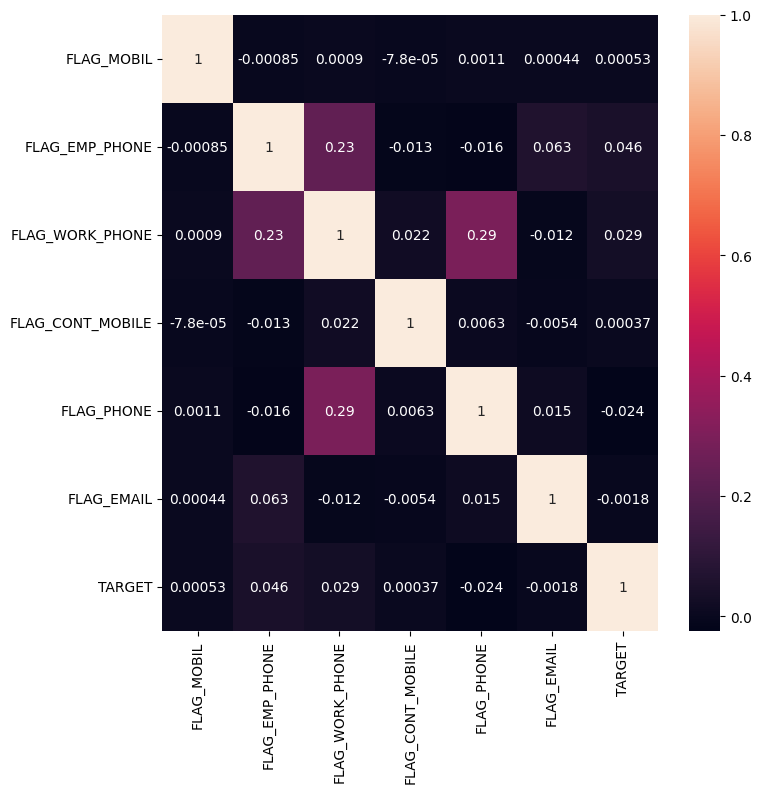

In [24]:
# Heatmap for the same
fig = plt.figure(figsize=(8,8))
sns.heatmap(data=contact_corr, annot=True)

In [25]:
# here we can see that not a single column from contact has even absolute corr coeff more than 0.05
# this shows no relation between these columns with target
# add these columns to the list of removal columns

In [26]:
unnecessary_cols = unnecessary_cols + contact_col
len(unnecessary_cols)

76

In [27]:
# Drop all the unneccessary columns
app_df.drop(labels=unnecessary_cols, axis=1, inplace=True)
app_df.shape

(307511, 46)

In [28]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Previous application data

In [29]:
# cheking null value percentage in previous application data
((prev_df.isnull().sum() / prev_df.shape[0])*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

                index          0
0          SK_ID_PREV   0.000000
1          SK_ID_CURR   0.000000
2  NAME_CONTRACT_TYPE   0.000000
3         AMT_ANNUITY  22.286665
4     AMT_APPLICATION   0.000000
Index(['index', 0], dtype='object')


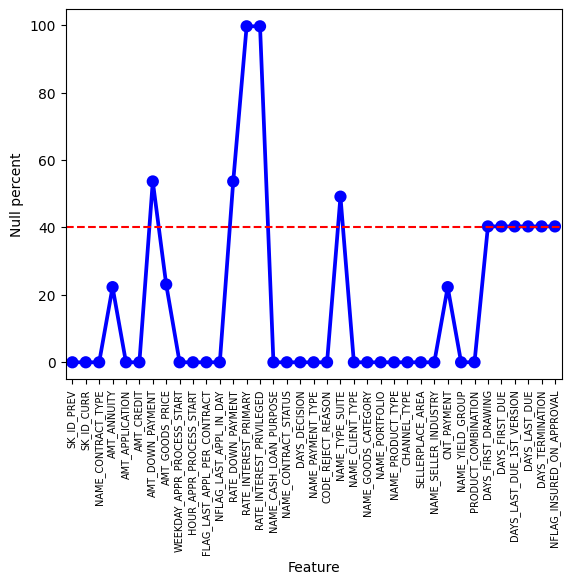

In [30]:
# here we can see that some of the columns have more than 40% null values and some of them even have more than 99%
# let's plot them for better visualization using pointplot

null_prevdf = pd.DataFrame((prev_df.isnull().sum() / prev_df.shape[0])*100).reset_index()
print(null_prevdf.head())
print(null_prevdf.columns)
# renaming the columns from 'index' to Feature and 0 to 'Null percent' for better readability
null_prevdf.columns = ["Feature", "Null percent"]
plt.xticks(rotation =90,fontsize =7)
ax = sns.pointplot(null_prevdf, x="Feature", y="Null percent", color='blue')
ax.axhline(40, color='red', ls='--')

In [31]:
# more than or equal to 40% null values columns
null_prevdf40 = null_prevdf[null_prevdf["Null percent"]>=40.0]
null_prevdf40

,Feature,Null percent
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [32]:
# These columns can be deleted. Before deleting these columns, let's review if there are more columns which can be dropped or not

In [33]:
# From the column description we can see that following 4 columns has no importance in analysis because they generally do not affect the loan default status
# WEEKDAY_APPR_PROCESS_START
# HOUR_APPR_PROCESS_START
# FLAG_LAST_APPL_PER_CONTRACT
# NFLAG_LAST_APPL_IN_DAY
# so, we directly remove them without any hesitation and maintaining stability

In [34]:
unwanted_prevcol = null_prevdf40['Feature'].to_list()
unwanted_prevcol = unwanted_prevcol + ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [35]:
# dropping unwanted columns
prev_df.drop(labels=unwanted_prevcol,axis=1,inplace=True)
prev_df.shape

(1670214, 22)

In [36]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

# Standardize values

## For Application data

In [37]:
# 1. Check for DATE related data
# They are of the form int and float there are chances of negative values
# But we know days and date can't be negative.
# So, lets' find out and standardize them by making them positive if any

In [38]:
# DAYS_BIRTH,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH
print("Original shape: ",app_df.shape)
print("-ve in DAYS_BIRTH",app_df[app_df['DAYS_BIRTH']<0].shape)
print("-ve in DAYS_EMPLOYED",app_df[app_df['DAYS_EMPLOYED']<0].shape)
print("-ve in DAYS_REGISTRATION",app_df[app_df['DAYS_REGISTRATION']<0].shape)
print("-ve in DAYS_ID_PUBLISH",app_df[app_df['DAYS_ID_PUBLISH']<0].shape)

Original shape:  (307511, 46)
-ve in DAYS_BIRTH (307511, 46)
-ve in DAYS_EMPLOYED (252135, 46)
-ve in DAYS_REGISTRATION (307431, 46)
-ve in DAYS_ID_PUBLISH (307495, 46)


In [39]:
for col in ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']:
    app_df[col] = abs(app_df[col])

In [40]:
print("-ve in DAYS_BIRTH",app_df[app_df['DAYS_BIRTH']<0].shape)
print("-ve in DAYS_EMPLOYED",app_df[app_df['DAYS_EMPLOYED']<0].shape)
print("-ve in DAYS_REGISTRATION",app_df[app_df['DAYS_REGISTRATION']<0].shape)
print("-ve in DAYS_ID_PUBLISH",app_df[app_df['DAYS_ID_PUBLISH']<0].shape)

-ve in DAYS_BIRTH (0, 46)
-ve in DAYS_EMPLOYED (0, 46)
-ve in DAYS_REGISTRATION (0, 46)
-ve in DAYS_ID_PUBLISH (0, 46)


count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


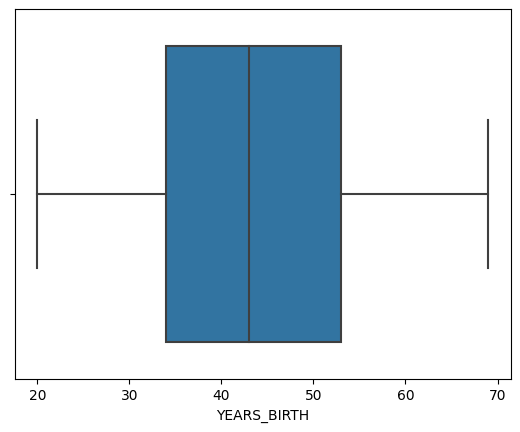

In [41]:
# Create a new column YEARS_BIRTH for easier analysis
app_df['YEARS_BIRTH'] = app_df['DAYS_BIRTH'].apply(lambda x: (x // 365))
print(app_df['YEARS_BIRTH'].describe())
sns.boxplot(data=app_df, x='YEARS_BIRTH')
plt.show()

In [42]:
# Minimum age for applicants is 21
# Max age is 90
# No outliers
# Most applicants are in age group 34-54

In [43]:
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']
# [0,20], (20,30], (30,40], ...
# binning the age data to find the age group wise distribution of applicants
# cut():  function is used to separate the array elements into different bins
app_df['AGE_GROUP'] = pd.cut(app_df['YEARS_BIRTH'],bins=bins,labels=slots)
app_df['AGE_GROUP'].value_counts()

50 above    97187
30-40       83117
40-50       74401
20-30       52805
0-20            1
Name: AGE_GROUP, dtype: int64

In [44]:
# View percentage for same
app_df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

In [45]:
# 31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [46]:
# Binning Numerical Columns like INCOME, Credit, Employment years, etc. to create a categorical column
# It'll help in analyzing data in groups 

In [47]:
# 1. AMT_INCOME_TOTAL
app_df['AMT_INCOME_TOTAL'].describe()['max'],app_df['AMT_INCOME_TOTAL'].describe()['min']
# maximum income is 117000K => more then 1 Million (1.17M)
# We can devide data in range of 100K

(117000000.0, 25650.0)

In [48]:
app_df['AMT_INCOME_TOTAL'] = app_df['AMT_INCOME_TOTAL'] / 100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_df['INCOME_GRP'] = pd.cut(app_df['AMT_INCOME_TOTAL'], bins=bins, labels=slot)

app_df['INCOME_GRP'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: INCOME_GRP, dtype: float64

In [49]:
# More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [50]:
# 2. AMT_CREDIT
app_df['AMT_CREDIT'].describe()['max'],app_df['AMT_CREDIT'].describe()['min']
# maximum income is 4050000
# We can devide data in range of 100K

(4050000.0, 45000.0)

In [51]:
app_df['AMT_CREDIT'] = app_df['AMT_CREDIT']/100000

In [52]:
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']
app_df['CREDIT_GRP'] = pd.cut(app_df['AMT_CREDIT'], bins=bins, labels=slot)
app_df['CREDIT_GRP'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: CREDIT_GRP, dtype: float64

In [53]:
# More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [54]:
# 3. Employed years
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'] / 365

bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app_df['EMP_YEAR_GRP'] = pd.cut(app_df['YEARS_EMPLOYED'], bins=bins, labels=slots)

app_df['EMP_YEAR_GRP'].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-20       15.229143
20-30        3.788050
30-40        1.099014
40-50        0.092807
50-60        0.000000
60 above     0.000000
Name: EMP_YEAR_GRP, dtype: float64

In [55]:
# more than 50% applicants are freshly employed with experience less than 5 years
# around 80% of applicants have experience less than 10 years

In [56]:
# check for columns which have numeric or object type data but they are actually categorical in type
# like contract type, live in city or not, etc.
# For example, contract type has values like cash and revolve loans which can be converted to categorical type for better data manipulation

# The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but internally is represented by an array of integers. 
# This allows the data to be sorted in a custom order and to more efficiently store the data. (Basically ENUM of C++)
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [57]:
app_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMP_YEAR_GRP                        6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [58]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    app_df[col] =pd.Categorical(app_df[col])

In [59]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

## For previous application data

In [60]:
# Convert DAYS_DECISION from negative to positive values and create categorical bins columns.
prev_df['DAYS_DECISION'] = abs(prev_df['DAYS_DECISION'])

In [61]:
bins = [0,400,800,1200,1600,2000,2400,2800,3200]
slots = ['0-400','400-800','800-1200','1200-1600','1600-2000','2000-2400','2400-2800','2800-3200']

prev_df['DAYS_DEC_GRP'] = pd.cut(prev_df['DAYS_DECISION'], bins=bins, labels=slots)

prev_df['DAYS_DEC_GRP'].value_counts(normalize=True)*100

0-400        37.574526
400-800      22.900299
800-1200     12.426012
1200-1600     7.899646
2400-2800     6.292188
1600-2000     5.791174
2000-2400     5.689750
2800-3200     1.426404
Name: DAYS_DEC_GRP, dtype: float64

In [62]:
# 37% of applicants applied for new loan just within 0-400 daya of previous loan decision

In [63]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  object  
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object  
 8   NAME_CONTRACT_STATUS    1670214 non-null  object  
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  object  
 11  CODE_REJECT_REASON      1670214 non-null  object  
 12  NAME_CLIENT_TYPE        1670214 non-null  object  
 13  NAME_GOODS_CATEGORY     1670214 non-null  

In [64]:
prev_df.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_STATUS            4
NAME_YIELD_GROUP                5
NAME_PORTFOLIO                  5
DAYS_DEC_GRP                    8
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [65]:
#Converting Categorical columns from Object to categorical 
cat_col_prev = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in cat_col_prev:
    prev_df[col] =pd.Categorical(prev_df[col])

# NULL value treatment

- To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.
- To impute null values in categorical variables which has higher null percentage, a new category is created.
- To impute null values in numerical variables which has lower null percentage, median() is used as
    - There are no outliers in the columns
    - Mean returned decimal values and median returned whole numbers and the columns were number of requests

### App_df

In [66]:
((app_df.isnull().sum() / len(app_df))*100).sort_values()

SK_ID_CURR                      0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
YEARS_EMPLOYED                  0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_3                 0.000000
YEARS_BIRTH                     0.000000
AGE_GROUP                       0.000000
CREDIT_GRP                      0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
TARGET                          0.000000
CODE_GENDER                     0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STAT

In [67]:
# 1. Treating NAME_TYPE_SUITE
app_df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [68]:
# it can be seen than more than 50% applicants are accompanied
# replacing null values with mode 
app_df['NAME_TYPE_SUITE'].fillna(app_df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [69]:
# 2. OCCUPATION_TYPE
# It has around 31% null values which is 1/3rd of whole data
# this can't be replaced with mode because that will lead to wrong analysis

# So, we introduce a new entry 'Unknown' as a category for null values
app_df['OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')

app_df['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

<AxesSubplot: >

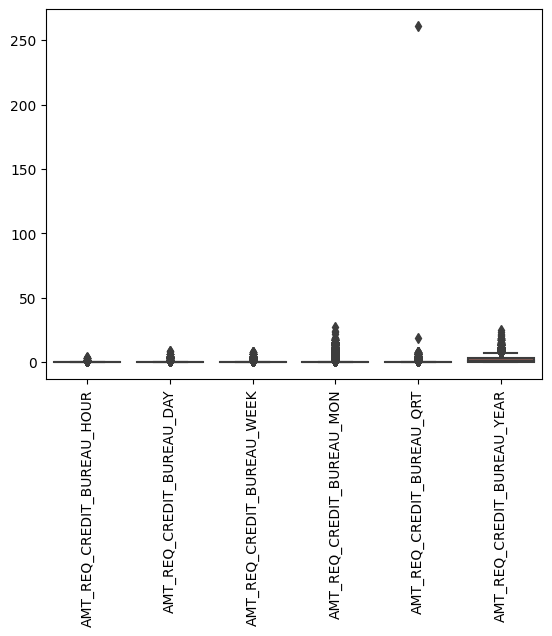

In [70]:
# 3. AMT_REQ_CREDIT_BUREAU_XXXX
# all these column are numeric type and represent number of queries (which can not be float)
# so we first plot box plots to see outliers
plt.xticks(rotation=90)
sns.boxplot(app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']])

# it can be seen that there are very few outliers

In [71]:
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe(percentiles=[0.1,0.25,0.5,0.75,0.8,0.9,0.99])

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
80%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
90%,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000


In [72]:
# there are no outliers that can be seen from results of describe() 
# here mean returns float value so we will replace null with median to maintain meaning of data (bcoz no. of queries can't be in float)

In [73]:
query_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in query_cols:
    app_df[col].fillna(app_df[col].median(),inplace = True)

In [74]:
# We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.

### Prev_df

- To impute null values in numerical column, we analysed the loan status and assigned values.
- To impute null values in continuous variables, we plotted the distribution of the columns and used
    - median if the distribution is skewed
    - mode if the distribution pattern is preserved.

In [75]:
((prev_df.isnull().sum() / prev_df.shape[0])*100.0).sort_values()

SK_ID_PREV                 0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_CLIENT_TYPE           0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
SK_ID_CURR                 0.000000
DAYS_DECISION              0.000000
DAYS_DEC_GRP               0.000000
AMT_CREDIT                 0.000060
PRODUCT_COMBINATION        0.020716
CNT_PAYMENT               22.286366
AMT_ANNUITY               22.286665
AMT_GOODS_PRICE           23.081773
dtype: float64

In [76]:
# very few column has high null values

In [77]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

<AxesSubplot: >

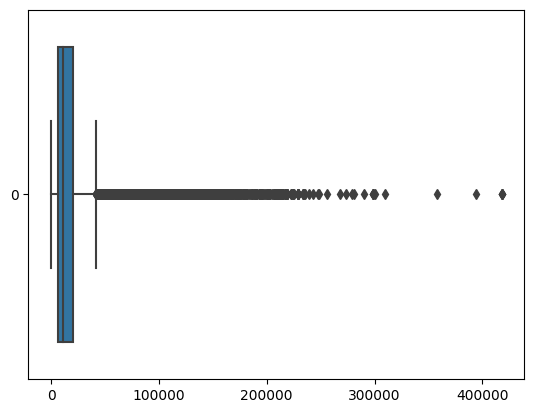

In [78]:
# 1. AMT_ANNUITY with 22% null values
# First we will boxplot it to see outliers
sns.boxplot(prev_df['AMT_ANNUITY'], orient='h')

<AxesSubplot: xlabel='AMT_ANNUITY', ylabel='Density'>

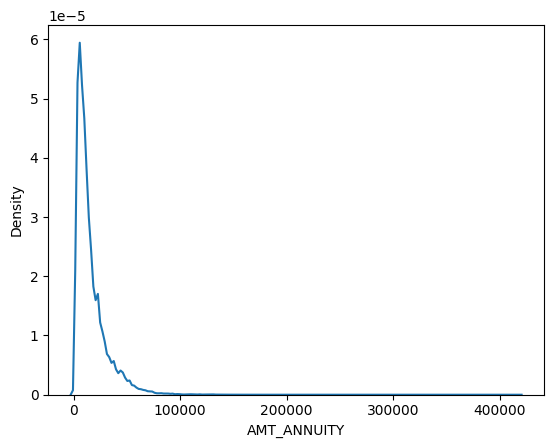

In [79]:
# here we can see that there are lots of outliers
# that means we can't replace null values with mean

# We plot distribution to see skewness of data
sns.kdeplot(prev_df['AMT_ANNUITY'])

In [80]:
# Here we can see that plot is very left skewed
# When the data is skewed, it is good to consider using the median value for replacing the missing values

# Another proof of outliers
# There is a single peak at the left side of the distribution 
# and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.

prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].median(), inplace=True)

<AxesSubplot: >

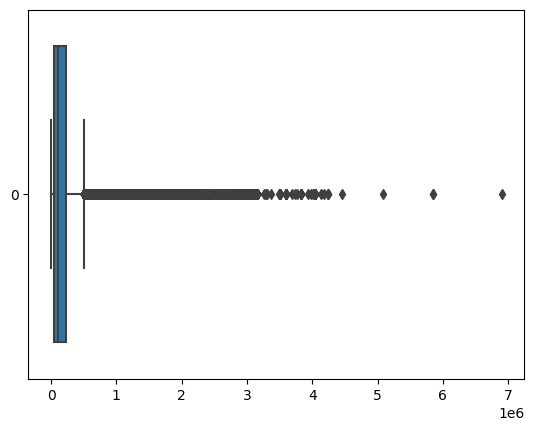

In [81]:
# 2. AMT_GOODS_PRICE (23% null values)
# First we will boxplot it to see outliers
sns.boxplot(prev_df['AMT_GOODS_PRICE'], orient='h')

<AxesSubplot: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

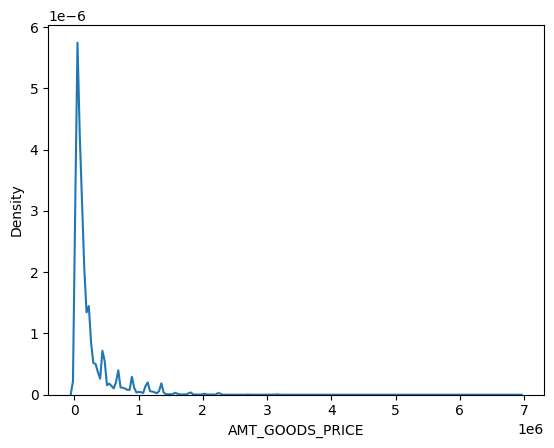

In [82]:
# here we can see that there are lots of outliers
# that means we can't replace null values with mean

# We plot distribution to see skewness of data
sns.kdeplot(prev_df['AMT_GOODS_PRICE'])

In [83]:
# here data is left skewed but there are also few small peaks in between
# which creates a doubt whether to replce null with median or not

# So, Let's replace using the mode, mean and median and see if the distribution is still about the same.

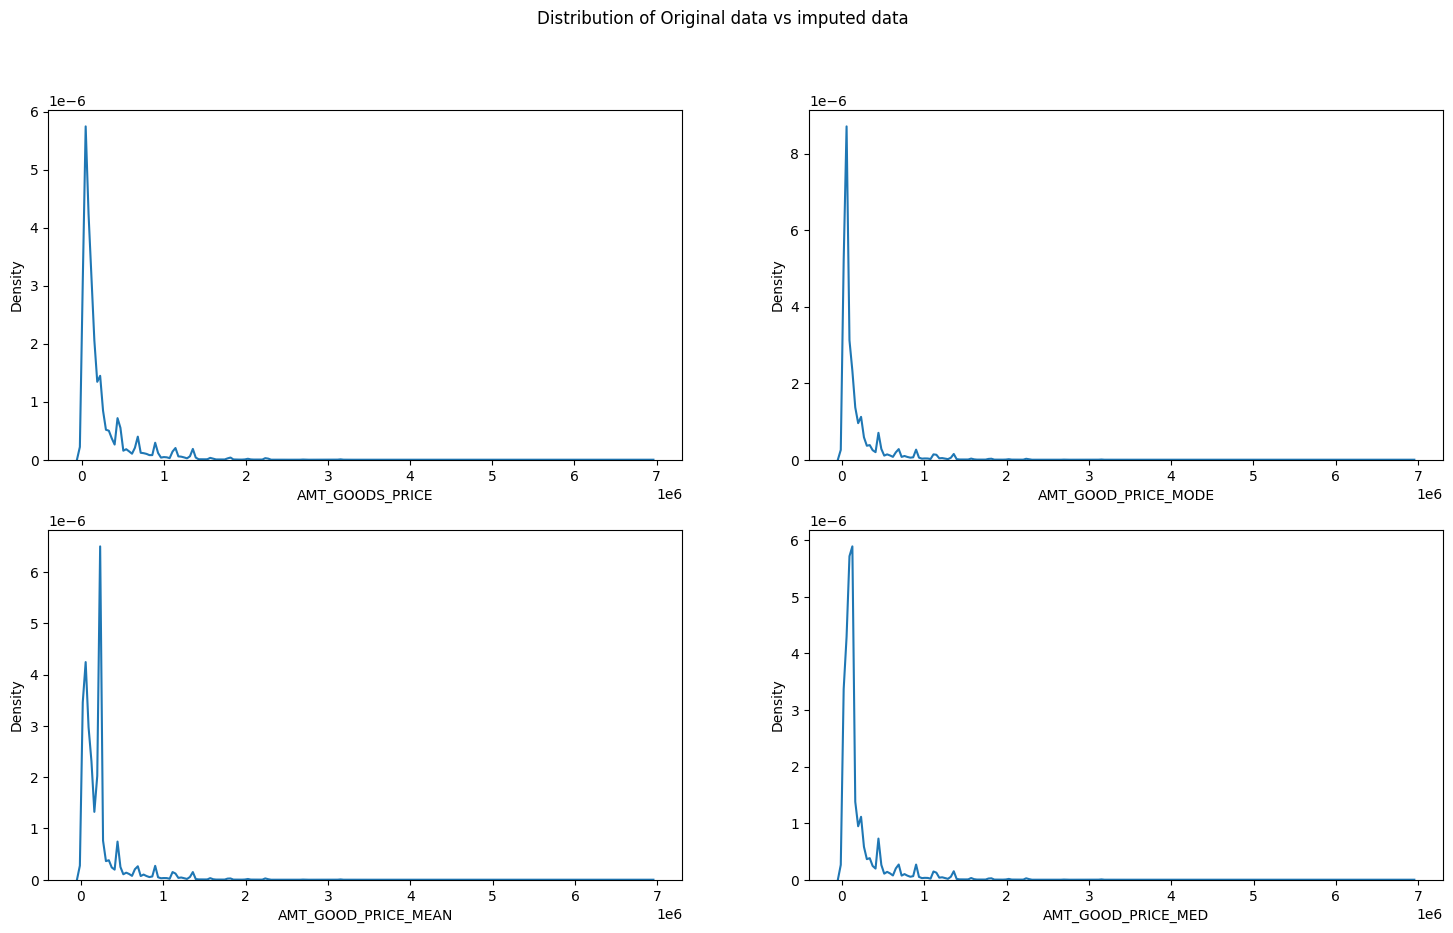

In [84]:
temp_df=pd.DataFrame()

# adding AMT_GOOD_PRICE column by replacing mean, median, mode one by one
temp_df['AMT_GOOD_PRICE_MODE'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mode()[0])
temp_df['AMT_GOOD_PRICE_MEAN'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mean())
temp_df['AMT_GOOD_PRICE_MED'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].median())

plot_cols = ['AMT_GOOD_PRICE_MODE','AMT_GOOD_PRICE_MEAN','AMT_GOOD_PRICE_MED']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')

plt.subplot(2,2,1)
sns.kdeplot(prev_df['AMT_GOODS_PRICE'])

for i in enumerate(plot_cols):
    plt.subplot(2,2,i[0]+2)
    sns.kdeplot(temp_df[i[1]])

In [85]:
# from above plots we can see that plot for mode is almost similar to original plot
# which means even if we replce null values wil mode the behaviour of distribution won't change

# So, we replace null with mode

In [86]:
prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\4022871180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pcorr = prev_df.corr()


<AxesSubplot: >

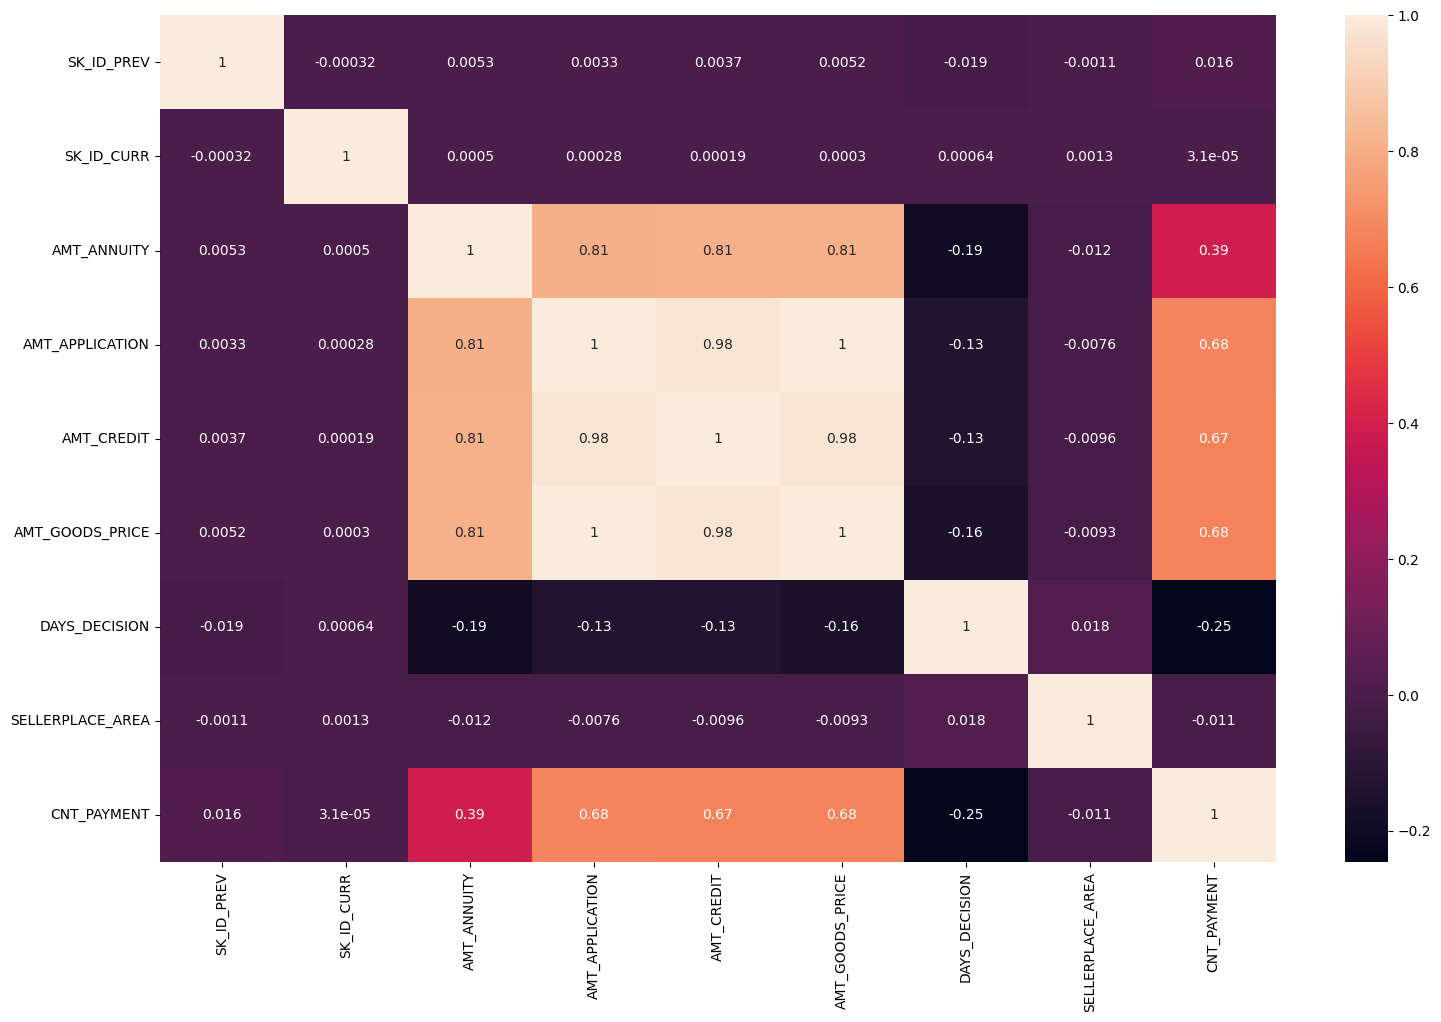

In [87]:
pcorr = prev_df.corr()
plt.figure(figsize=(18,11))
sns.heatmap(pcorr,annot=True)

<AxesSubplot: >

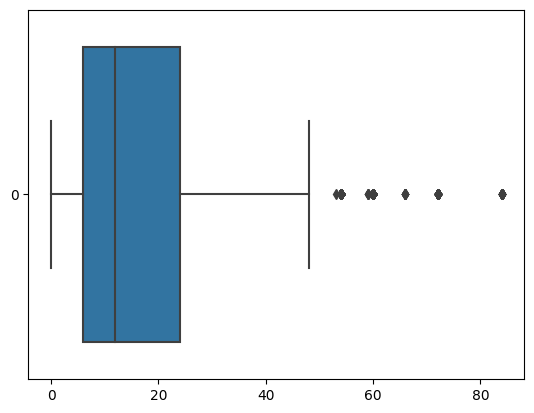

In [88]:
# 3. CNT_PAYMENT
# First we will boxplot it to see outliers
sns.boxplot(prev_df['CNT_PAYMENT'], orient='h')

In [89]:
# this shows very few outliers
prev_df['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

<AxesSubplot: xlabel='CNT_PAYMENT', ylabel='Density'>

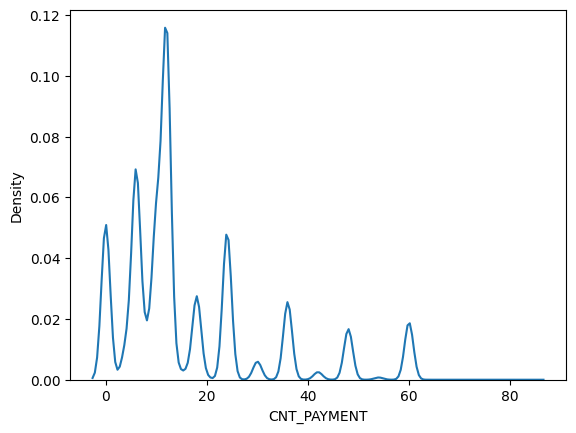

In [90]:
sns.kdeplot(prev_df['CNT_PAYMENT'])

In [91]:
# Here distribution is very fluctuated so, we don't have enough confidence for using median or mode as replacement

In [92]:
prev_df.loc[prev_df['CNT_PAYMENT'].isnull(), 'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [93]:
# fill null in CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:
prev_df['CNT_PAYMENT'].fillna(0,inplace = True)

In [94]:
(prev_df.isnull().sum() / prev_df.shape[0])*100.0

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NAME_CONTRACT_TYPE        0.000000
AMT_ANNUITY               0.000000
AMT_APPLICATION           0.000000
AMT_CREDIT                0.000060
AMT_GOODS_PRICE           0.000000
NAME_CASH_LOAN_PURPOSE    0.000000
NAME_CONTRACT_STATUS      0.000000
DAYS_DECISION             0.000000
NAME_PAYMENT_TYPE         0.000000
CODE_REJECT_REASON        0.000000
NAME_CLIENT_TYPE          0.000000
NAME_GOODS_CATEGORY       0.000000
NAME_PORTFOLIO            0.000000
NAME_PRODUCT_TYPE         0.000000
CHANNEL_TYPE              0.000000
SELLERPLACE_AREA          0.000000
NAME_SELLER_INDUSTRY      0.000000
CNT_PAYMENT               0.000000
NAME_YIELD_GROUP          0.000000
PRODUCT_COMBINATION       0.020716
DAYS_DEC_GRP              0.000000
dtype: float64

In [95]:
# We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.

# Outlier detection

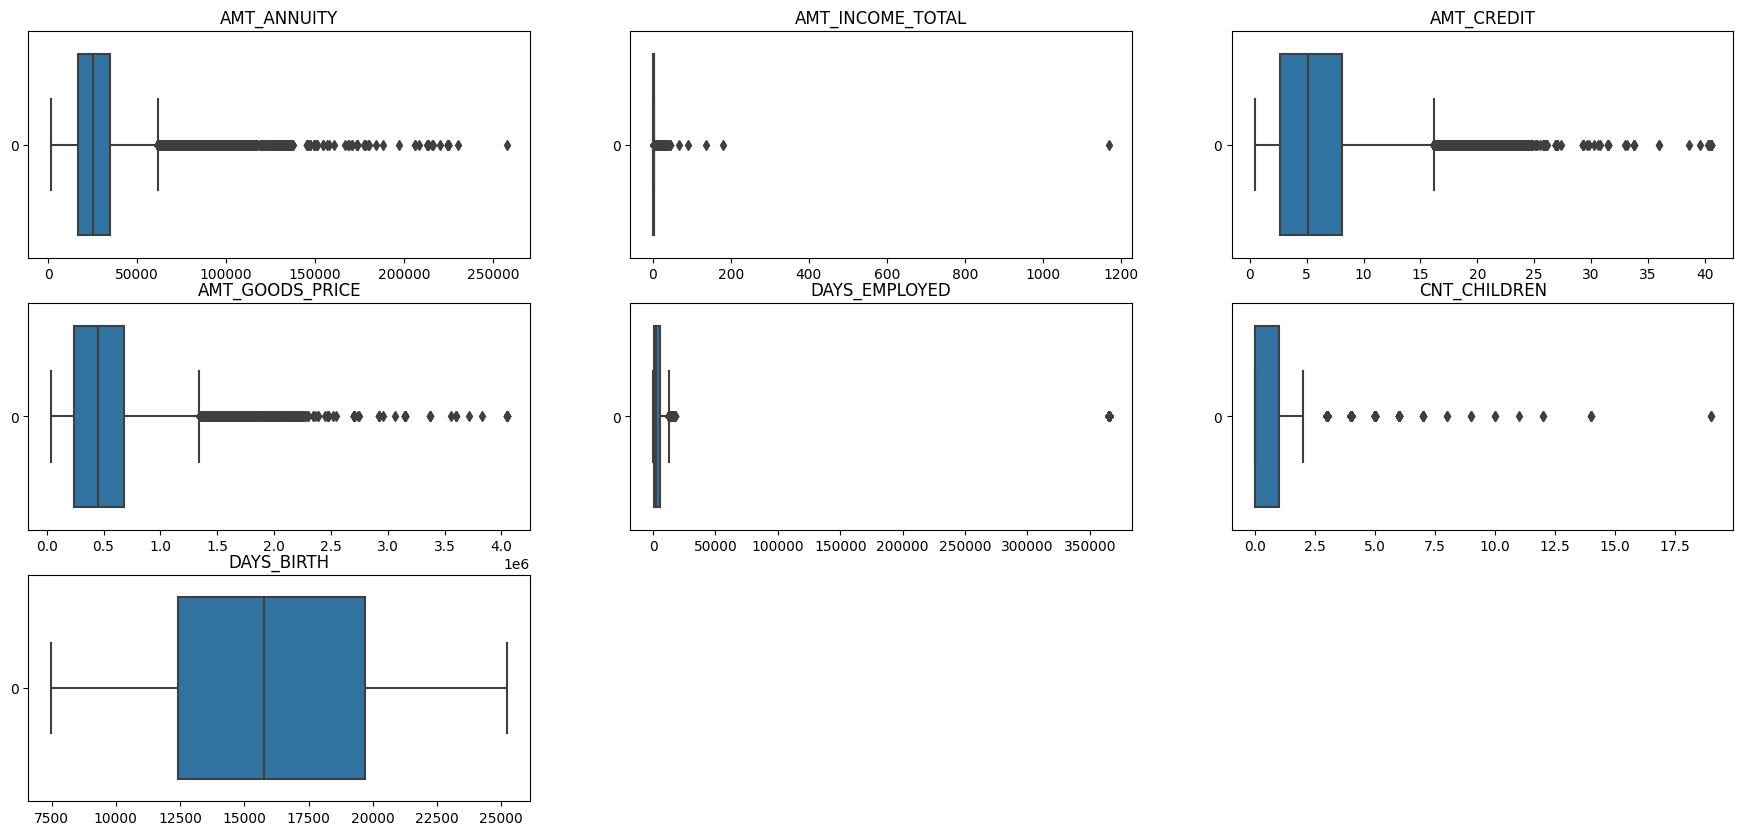

In [109]:
# in this section we will deal with outliers and 
# for that first we'll plot boxplots for the features
# Boxplot gives a good idea about of amount of outliers with the help of IQR

plt.figure(figsize=(22,10))

box_cols = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']

for i in enumerate(box_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(app_df[i[1]], orient='h')
    plt.title(i[1])

In [98]:
app_df['AMT_INCOME_TOTAL'].describe(percentiles=[0.1,0.25,0.5,0.75,0.8,0.99])

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
10%           0.810000
25%           1.125000
50%           1.471500
75%           2.025000
80%           2.250000
99%           4.725000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [105]:
app_df[app_df['AMT_INCOME_TOTAL'] >= 5.0]['AMT_INCOME_TOTAL'].count(), app_df[app_df['AMT_INCOME_TOTAL'] >= 4.0]['AMT_INCOME_TOTAL'].count(), app_df[app_df['AMT_INCOME_TOTAL'] >= 2.5]['AMT_INCOME_TOTAL'].count()

(2702, 8063, 39778)

In [103]:
# AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
# AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
# DAYS_BIRTH has no outliers which means the data available is reliable.
# DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [104]:
app_df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


In [106]:
# Outliers in prev_df

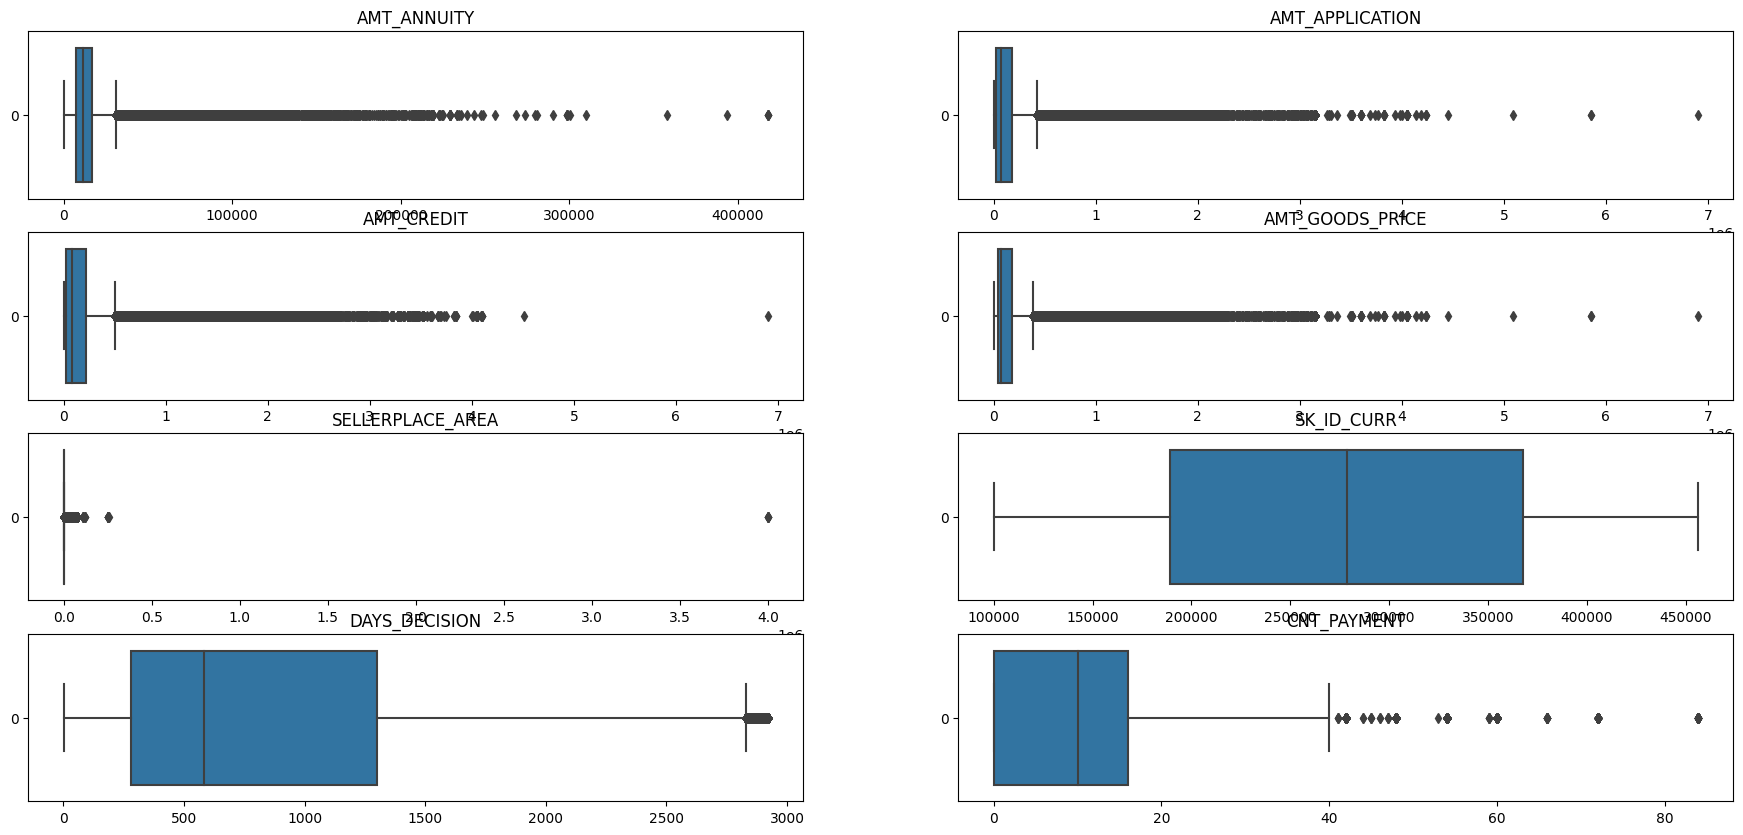

In [108]:
plt.figure(figsize=(22,10))

box_cols = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

for i in enumerate(box_cols):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(prev_df[i[1]], orient='h')
    plt.title(i[1])

In [110]:
# AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
# CNT_PAYMENT has few outlier values.
# SK_ID_CURR is an ID column and hence no outliers.
# DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

In [111]:
prev_df[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


# Final Data Analysis

In [115]:
app_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [121]:
print('Ratio of Repayer and Defaulter: %.2f & %.2f'%((app_df['TARGET'].value_counts()[0]*100.0)/app_df.shape[0], (app_df['TARGET'].value_counts()[1]*100.0)/app_df.shape[0]))

Ratio of Repayer and Defaulter: 91.93 & 8.07


In [122]:
# More than 90% of the applicants repay their loan amounts

### Plotting for categorical analysis

In [123]:
# 1.Univariate analysis (TARGET w.r.t one column)
## Writing generice function to plot count plots of various categorical column with respect to TARGET
# Also plotting percentage of defaulter in that column

In [134]:
# When as_index=True the key(s) you use in groupby() will become an index in the new dataframe.

# What are we doing in below line:
# 1. we are grouping the data according to GENDER
# ex. Male defaulter(TARGET=1)=XXXX, Male Repayer(TARGET=1)=XX, Female defaulter=XXXX, Female repayer=XX
# 2. Doing mean of them (Tricky part)
# mean function will add all the values of TARGET corresponding to Male
# that means 0+0+0+1+1+1+0+1+0... and divide it by number of males
# which indirectly percentage of defaulter in Male catgory because in the sum only 1 contributes
# same goes for female
# So, finally we get percentage/ratio of defaulter according to GENDER
app_df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'], as_index=False).mean()

,CODE_GENDER,TARGET
0,F,0.069993
1,M,0.101419
2,XNA,0.000000


In [176]:
# TARGET=1 : Defaulted
# TARGET=0 : Rapaid

def uni_plots(feature, ylog=False, hor=True, lb_rot=False):
    temp = app_df[feature].value_counts()
    # making dataframe of value counts
    # feature: indeices of value counts
    # no. of applicants: value counts
    df1 = pd.DataFrame({feature: temp.index, 'No. of applicants':temp.values})
    
    # calculating % of defaulter according to feature value
    cat_perc = app_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    # setting layout according to horizontal value
    if(hor):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))  
    
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app_df,
                    hue ="TARGET",
                    palette=['g','r'])
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    if lb_rot:
        s.set_xticklabels(s.get_xticklabels(),rotation=90)  
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    if lb_rot:
        s.set_xticklabels(s.get_xticklabels(),rotation=90)  
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.show()

In [140]:
# Plotting various categorical features

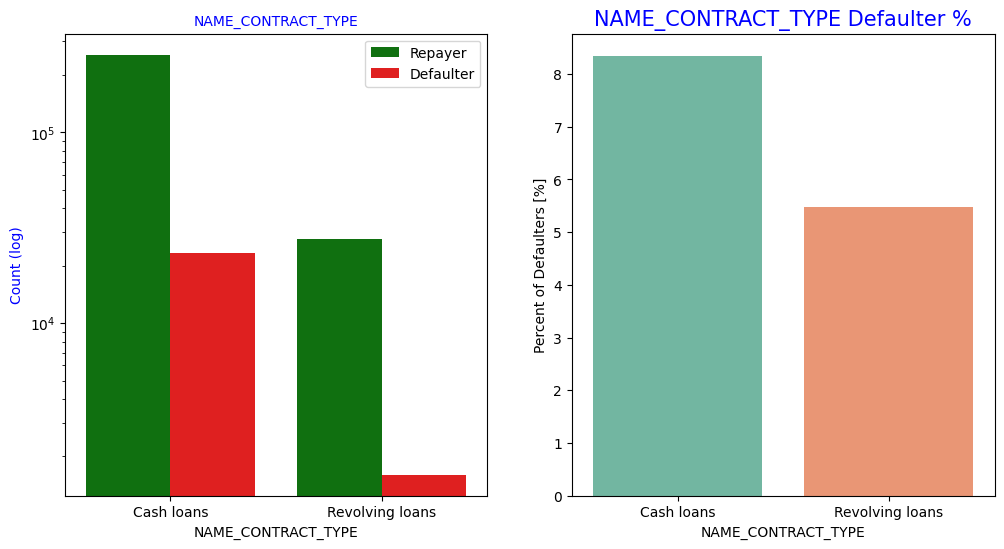

In [148]:
uni_plots('NAME_CONTRACT_TYPE',True)

In [149]:
# Revolving loans are just a small fraction (10%) from the total number of loans
# Most of the revolving loans are repaid
# Cash loans are more defaulted than revolving loans

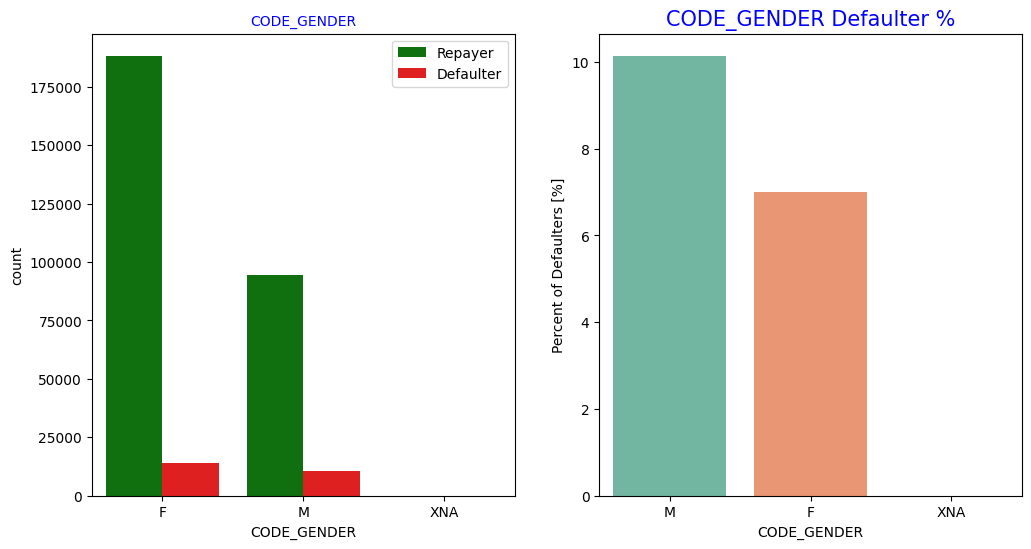

In [153]:
uni_plots('CODE_GENDER')

In [154]:
# The number of female clients is almost double the number of male clients. 
# Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%)

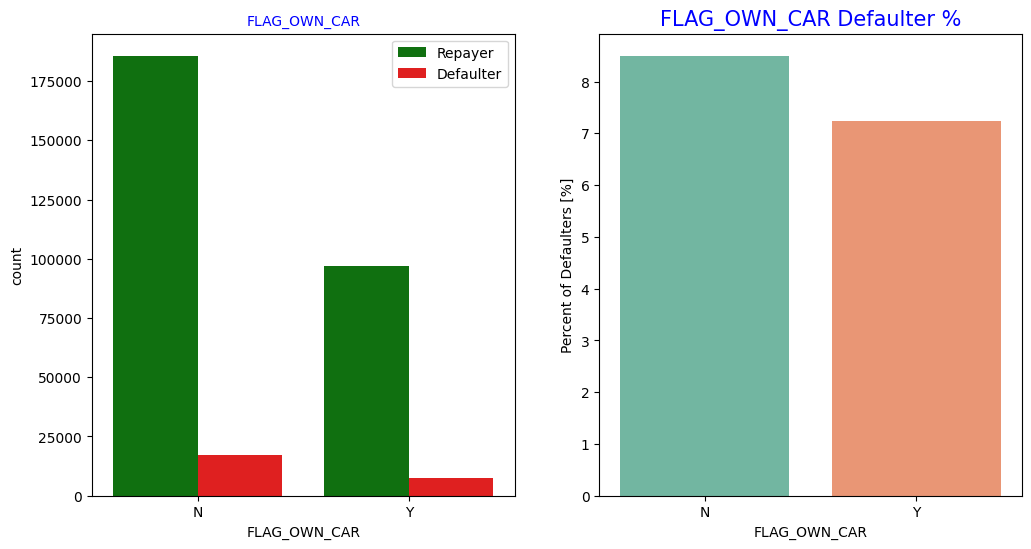

In [155]:
uni_plots('FLAG_OWN_CAR')

In [156]:
# Clients who own a car are almost half in number of the clients who dont own a car.
# percentage of default is almost same for car ownership status
# It is not affecting the loan defaultment

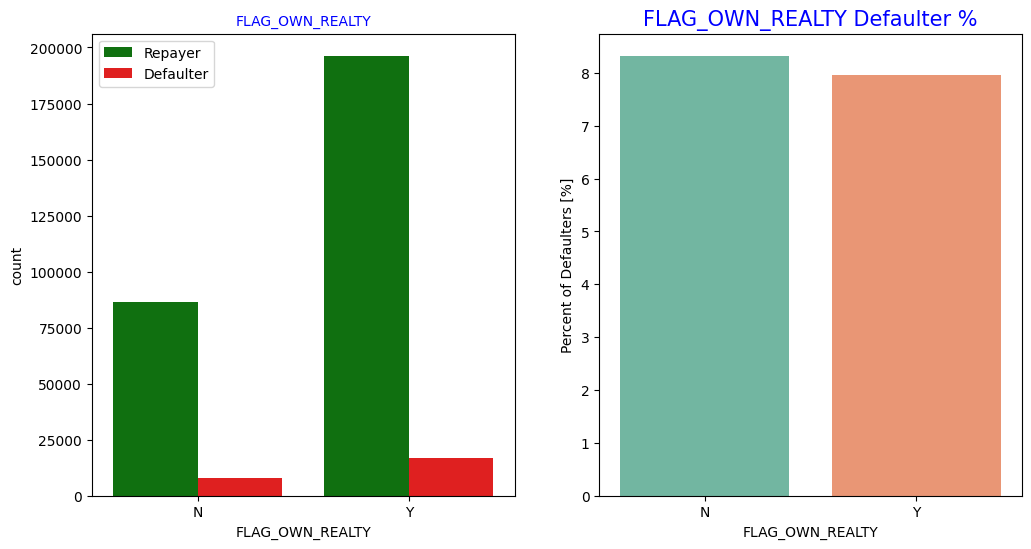

In [157]:
uni_plots('FLAG_OWN_REALTY')

In [158]:
# The clients who own real estate are more than double of the ones that don't own
# But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.

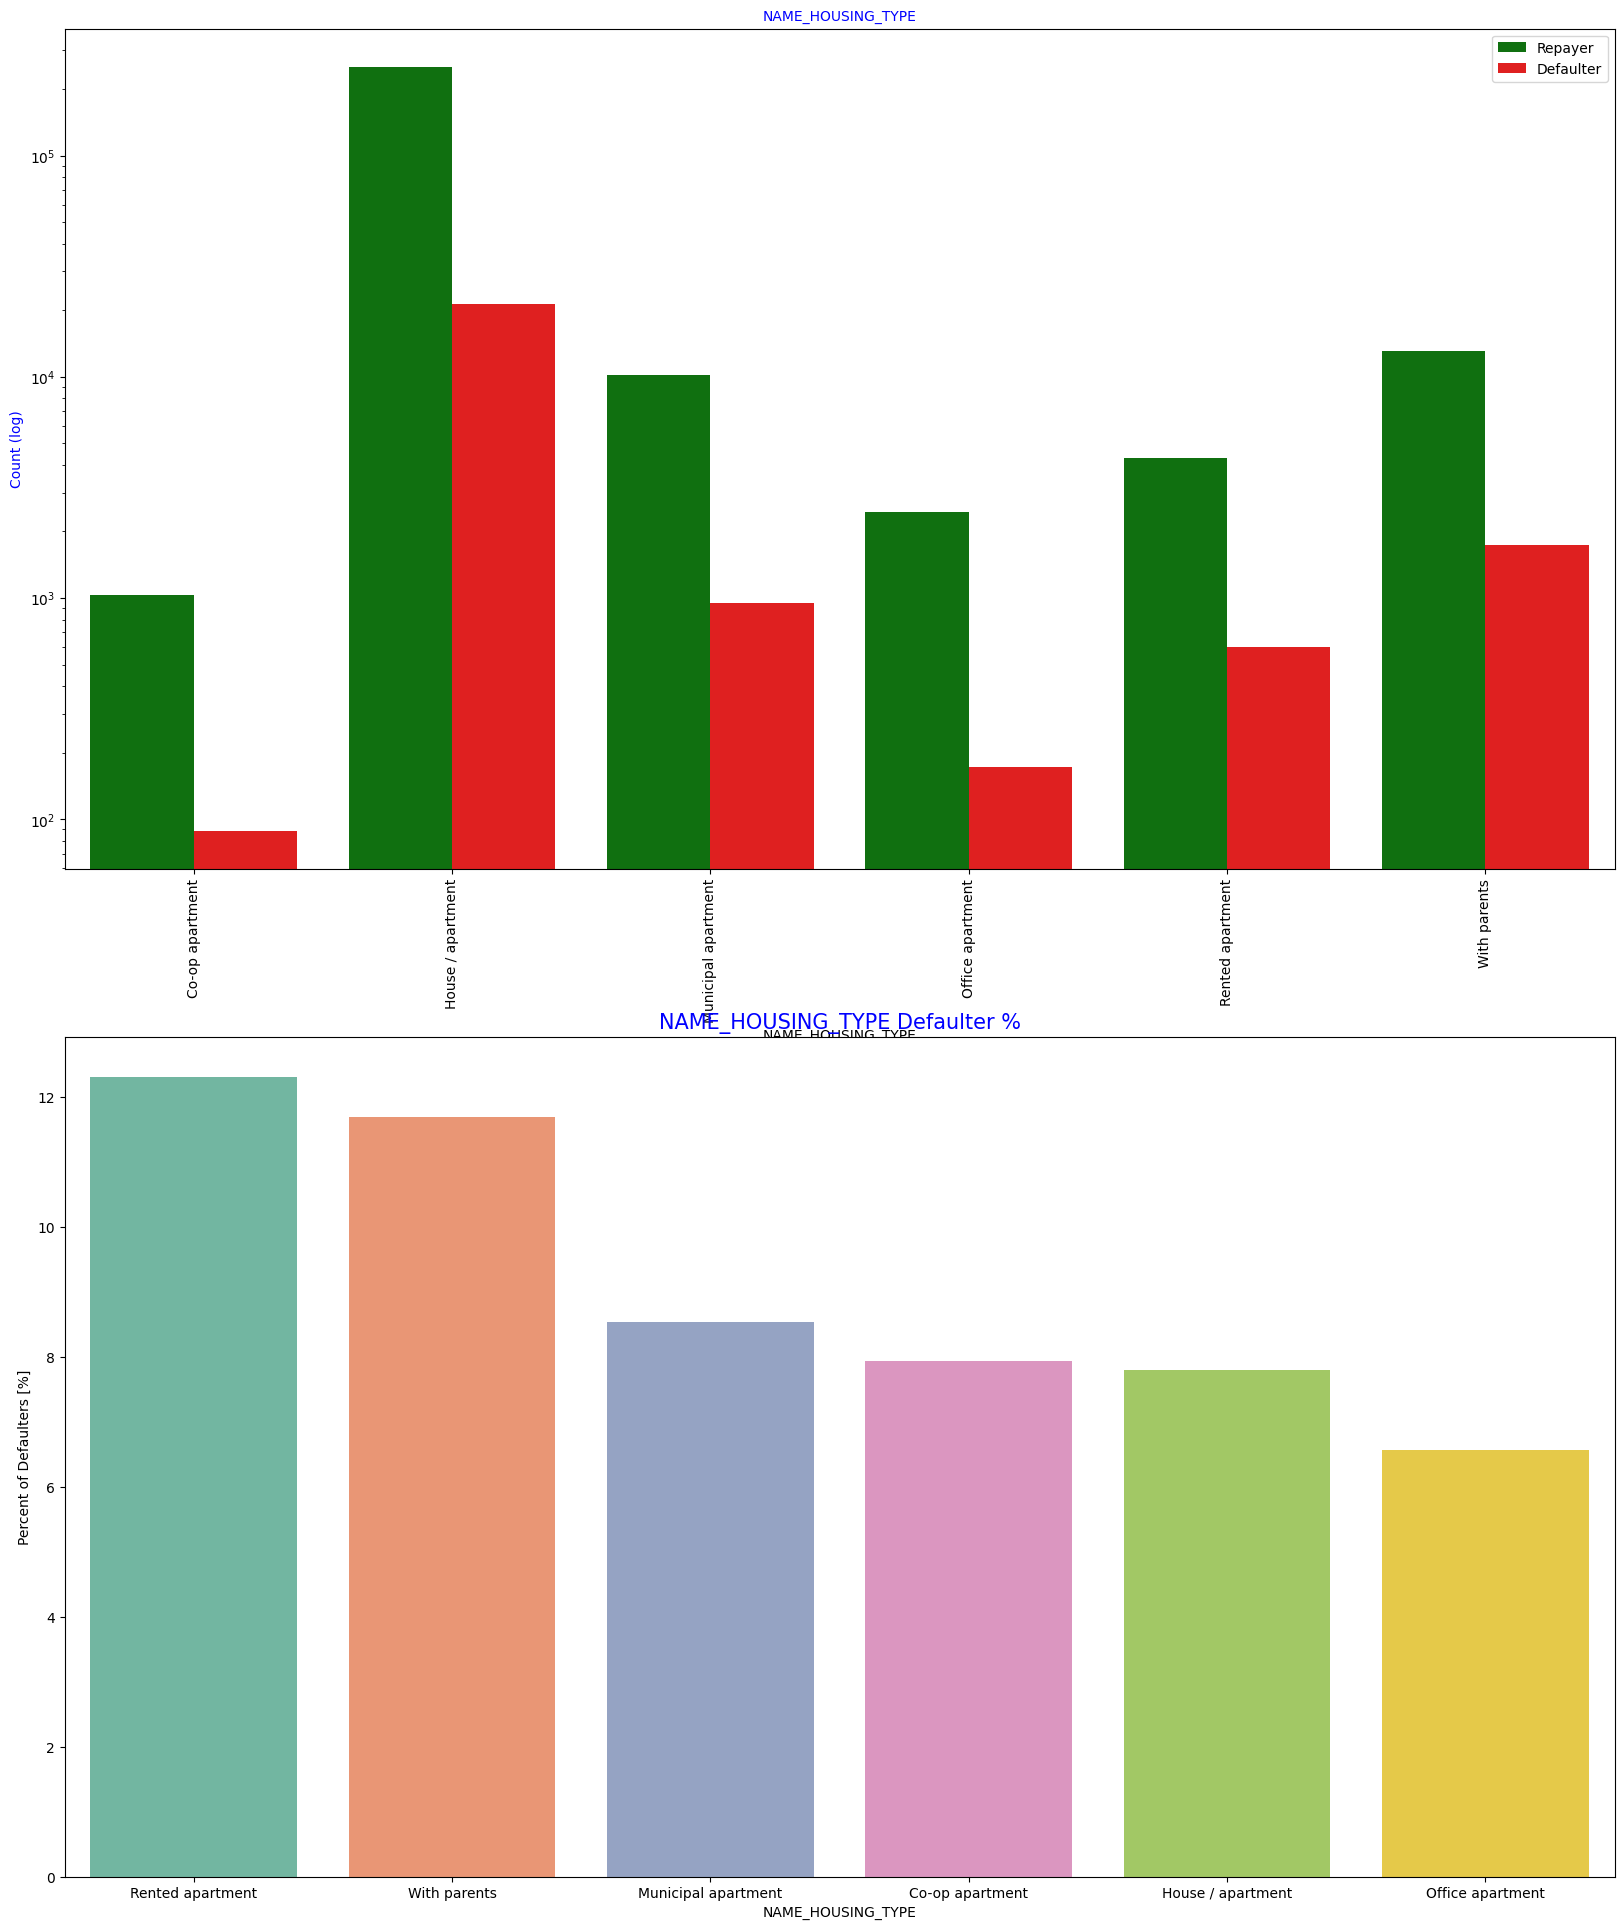

In [161]:
uni_plots('NAME_HOUSING_TYPE',True,False,True)

In [162]:
# Majority of people live in House/apartment
# People living in office apartments have lowest default rate
# People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting
# All other have almost same chance of defaultment (6-7%)

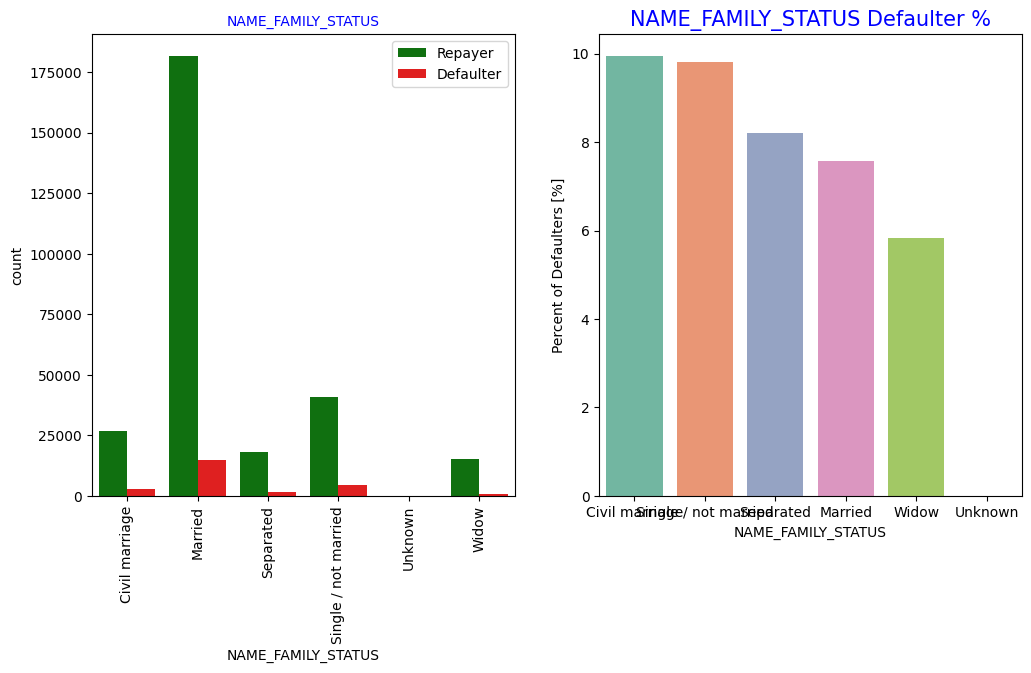

In [170]:
uni_plots('NAME_FAMILY_STATUS',False, True, True)

In [164]:
# Most of the people who have taken loan are married, followed by Single/not married and civil marriage
# Civil marriage and Single has the highest percent of not repayment (10%), with Widow the lowest 

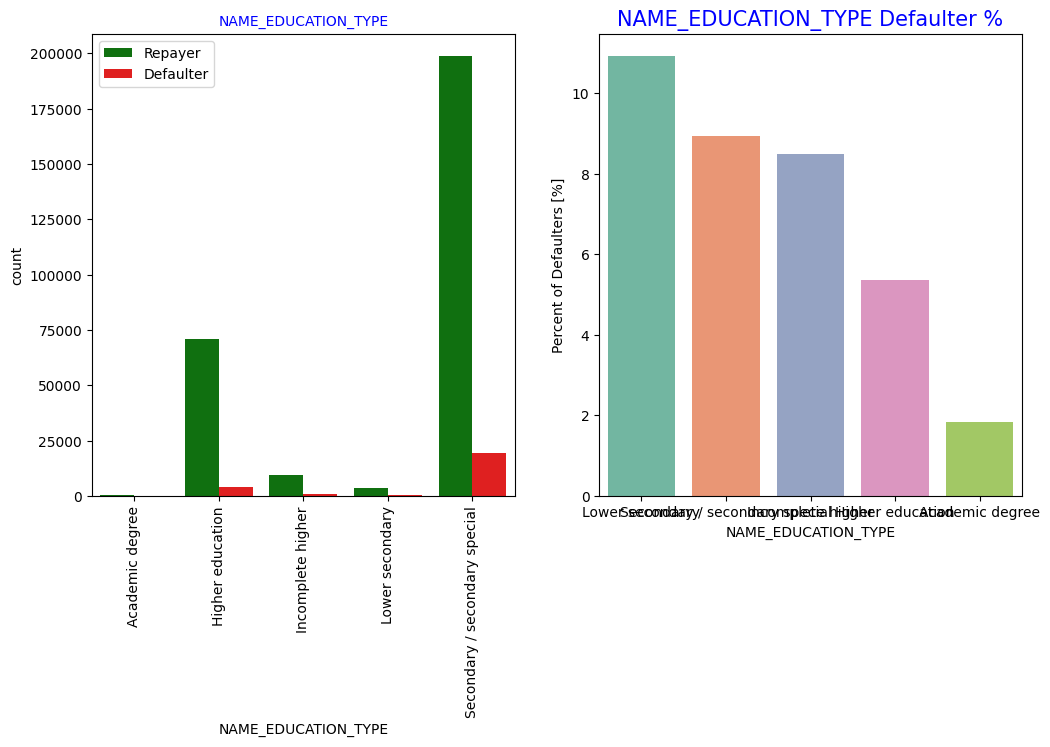

In [169]:
uni_plots('NAME_EDUCATION_TYPE',False,True,True)

In [171]:
# Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
# The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.


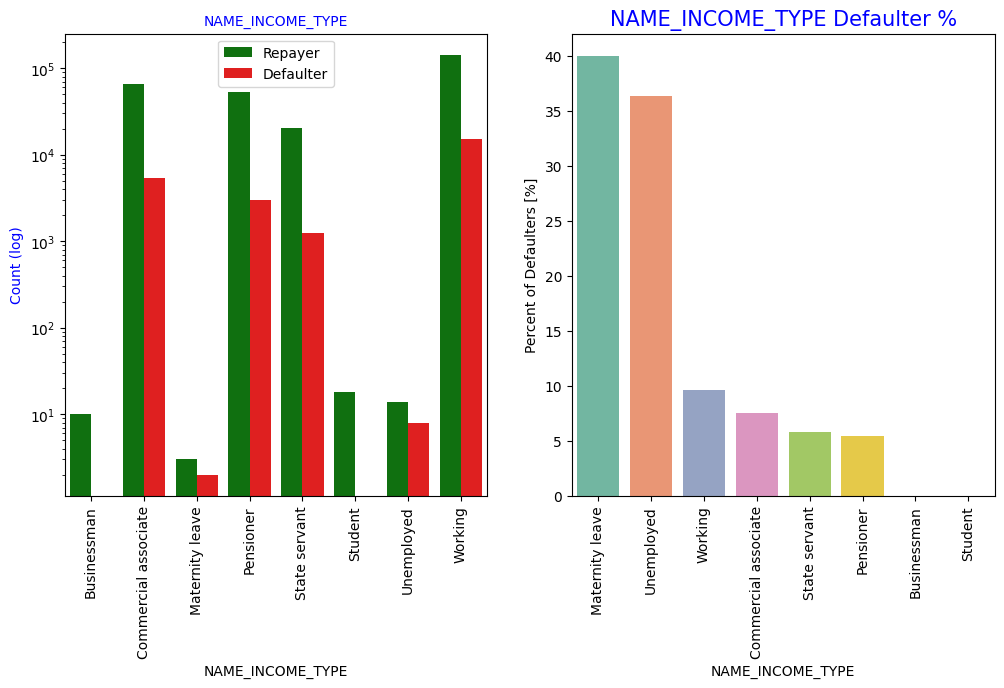

In [178]:
uni_plots('NAME_INCOME_TYPE',True,True,True)

In [179]:
# Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
# The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
# Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

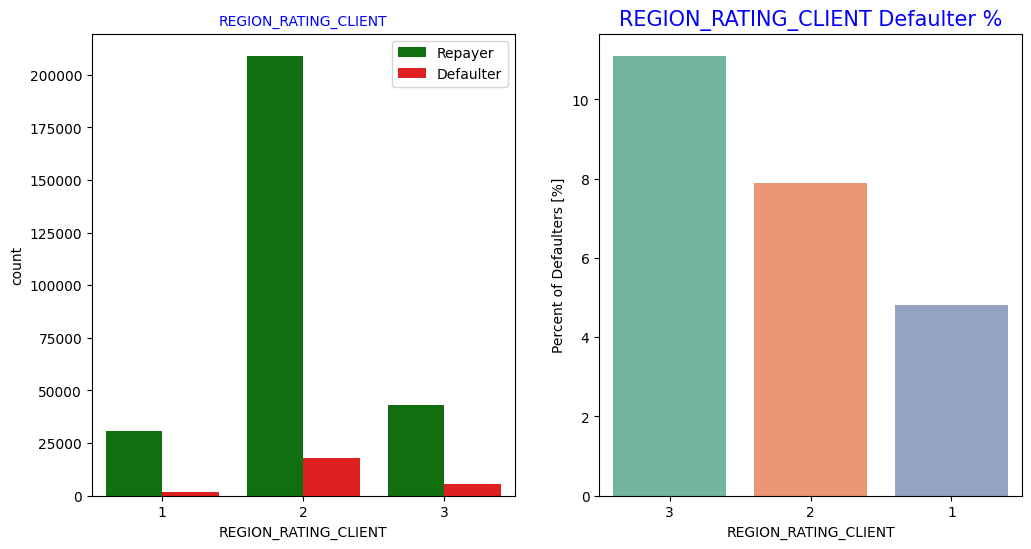

In [180]:
uni_plots('REGION_RATING_CLIENT')

In [181]:
# Most of the applicants are living in Region_Rating 2 place.
# Region Rating 3 has the highest default rate (11%)
# Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

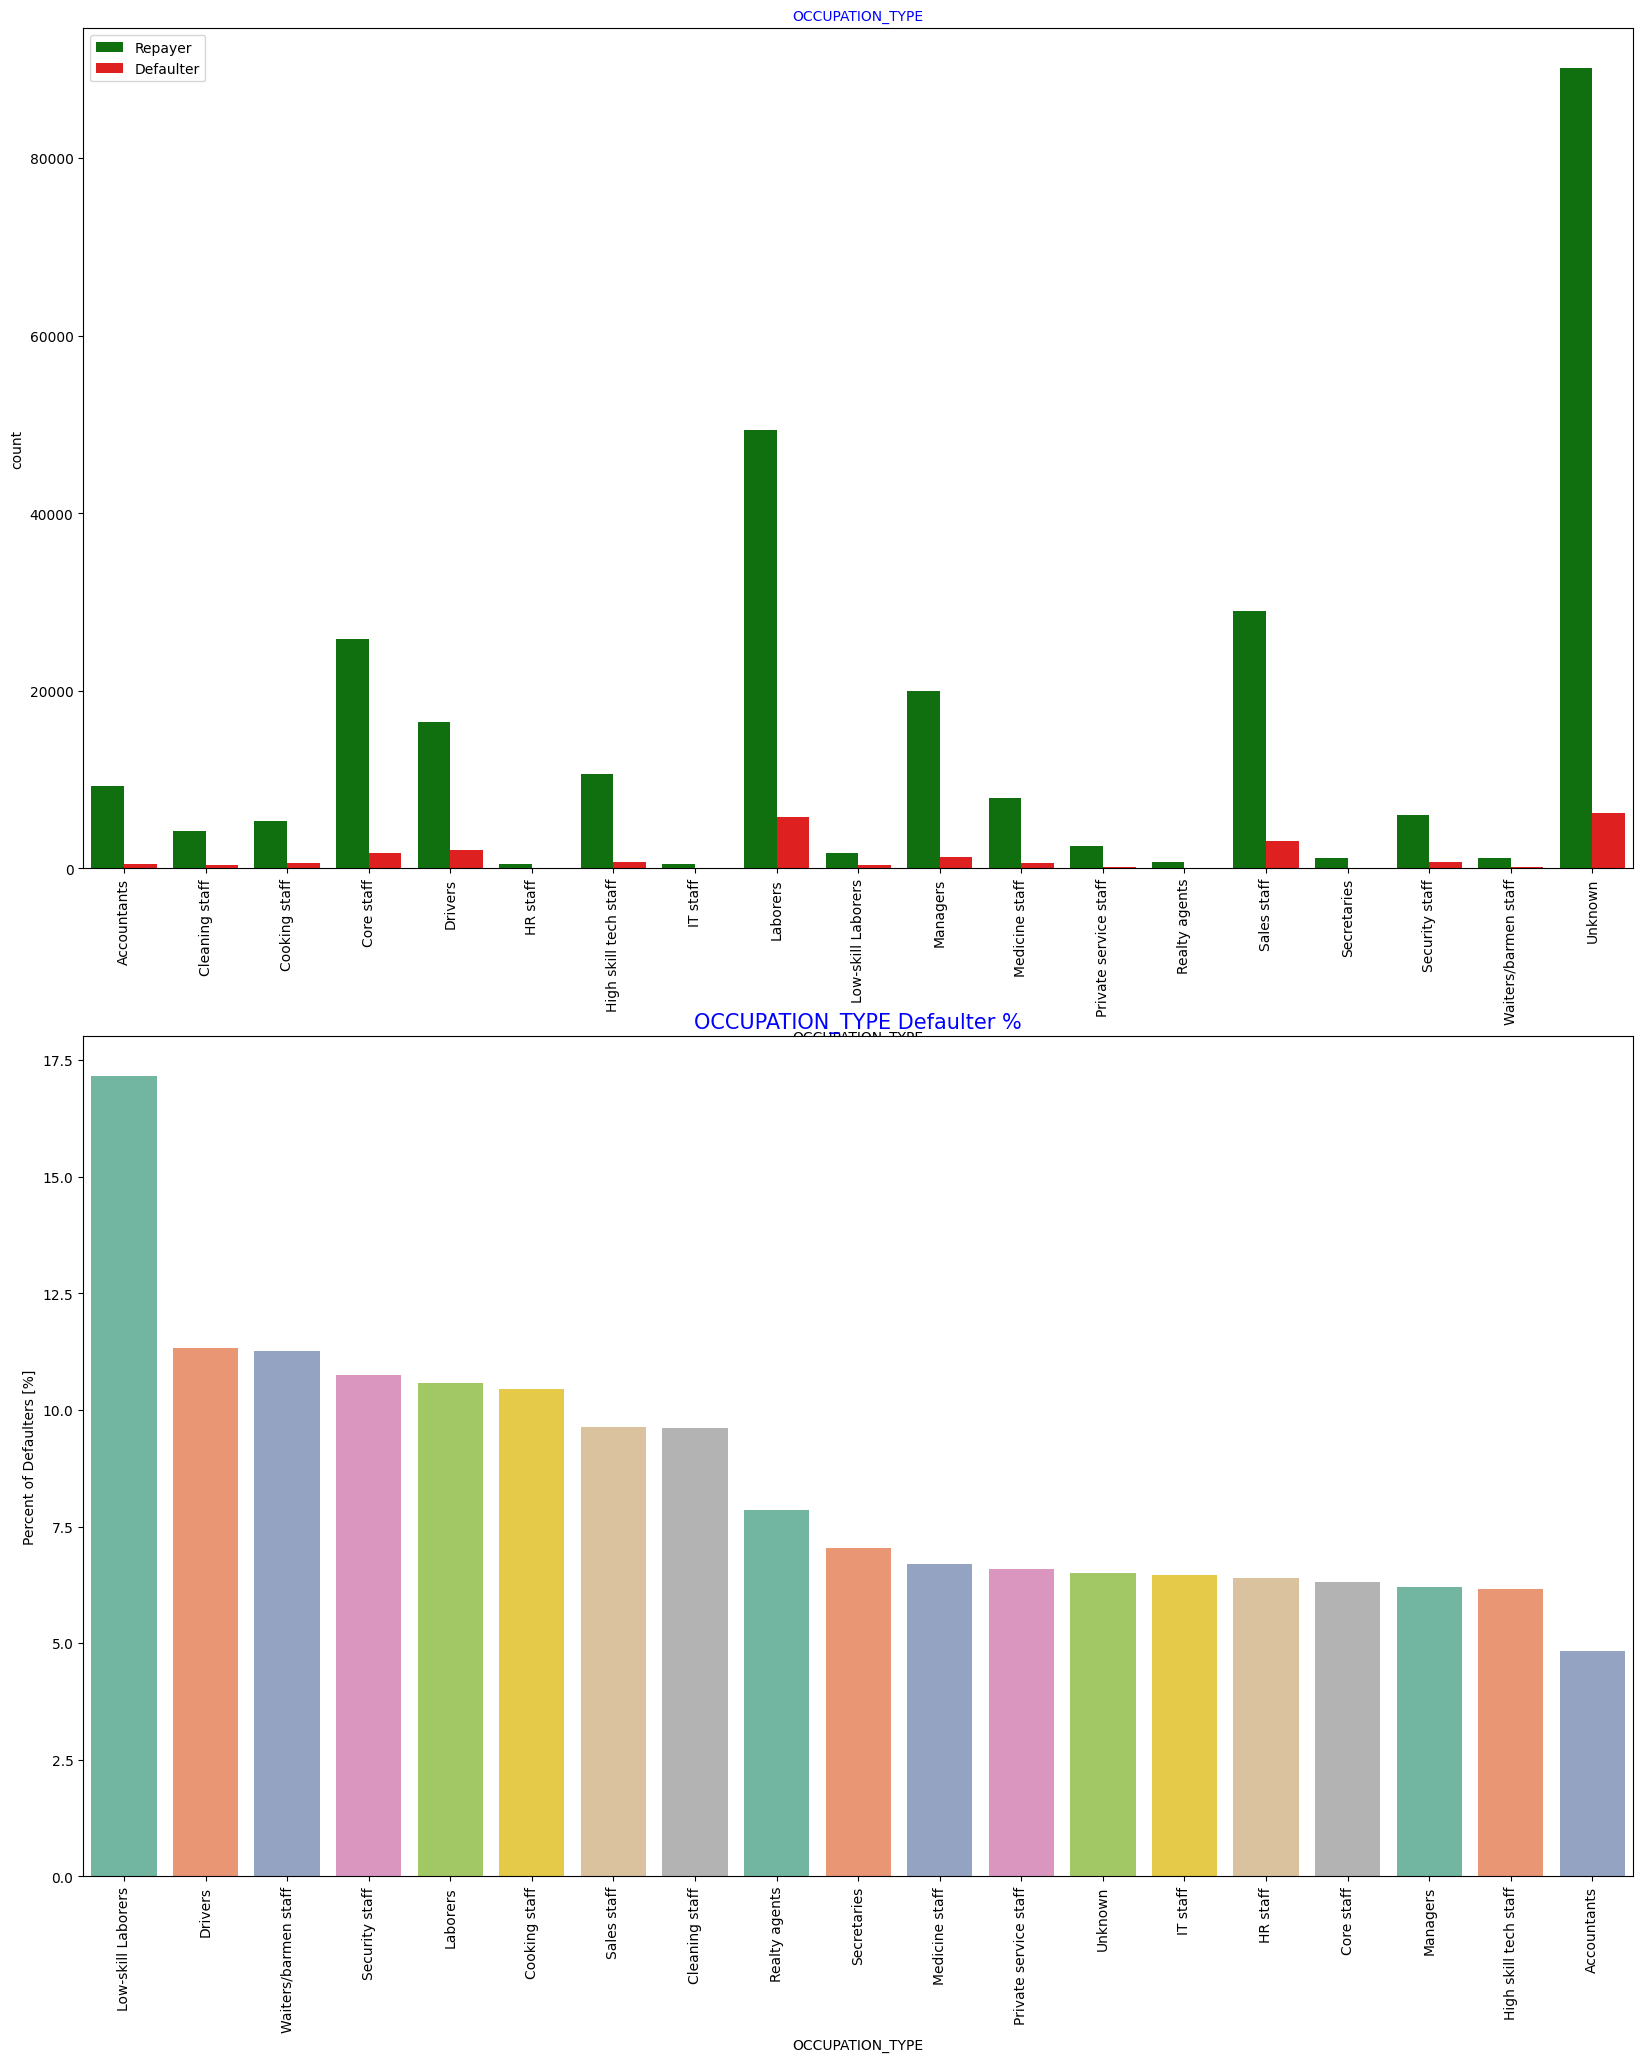

In [183]:
uni_plots('OCCUPATION_TYPE',False,False,True)

In [184]:
# Ignoring Unknown occupation, Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
# The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff (~11%)

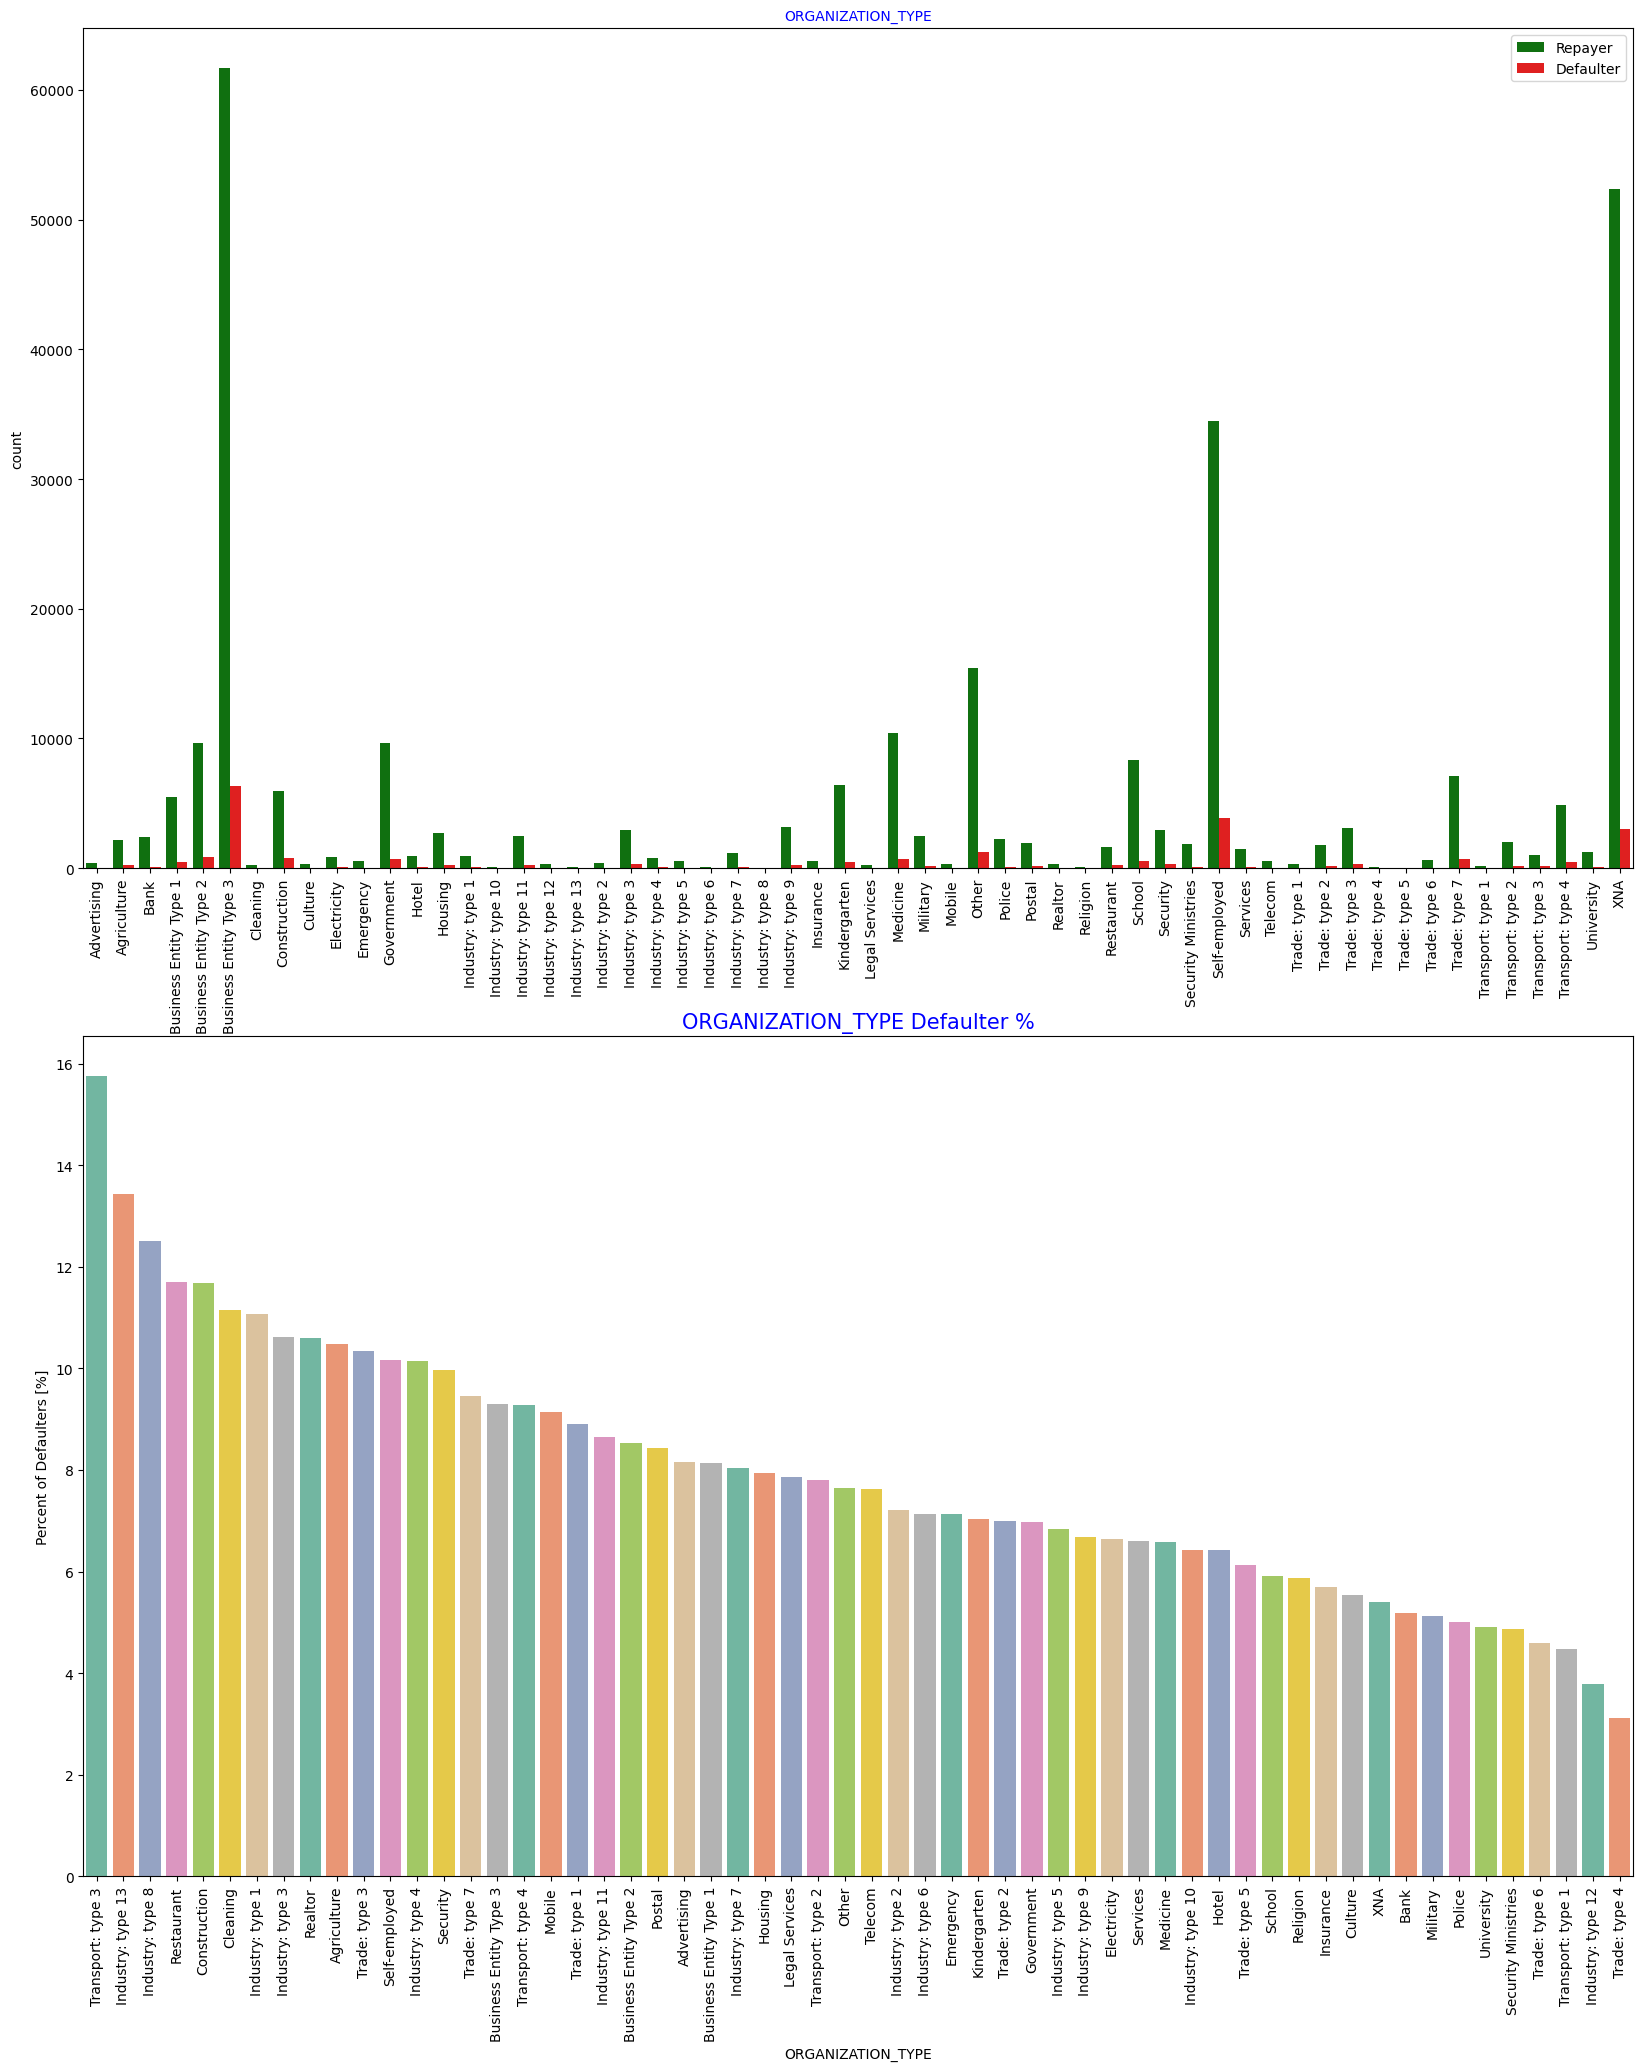

In [187]:
uni_plots('ORGANIZATION_TYPE',False,False,True)

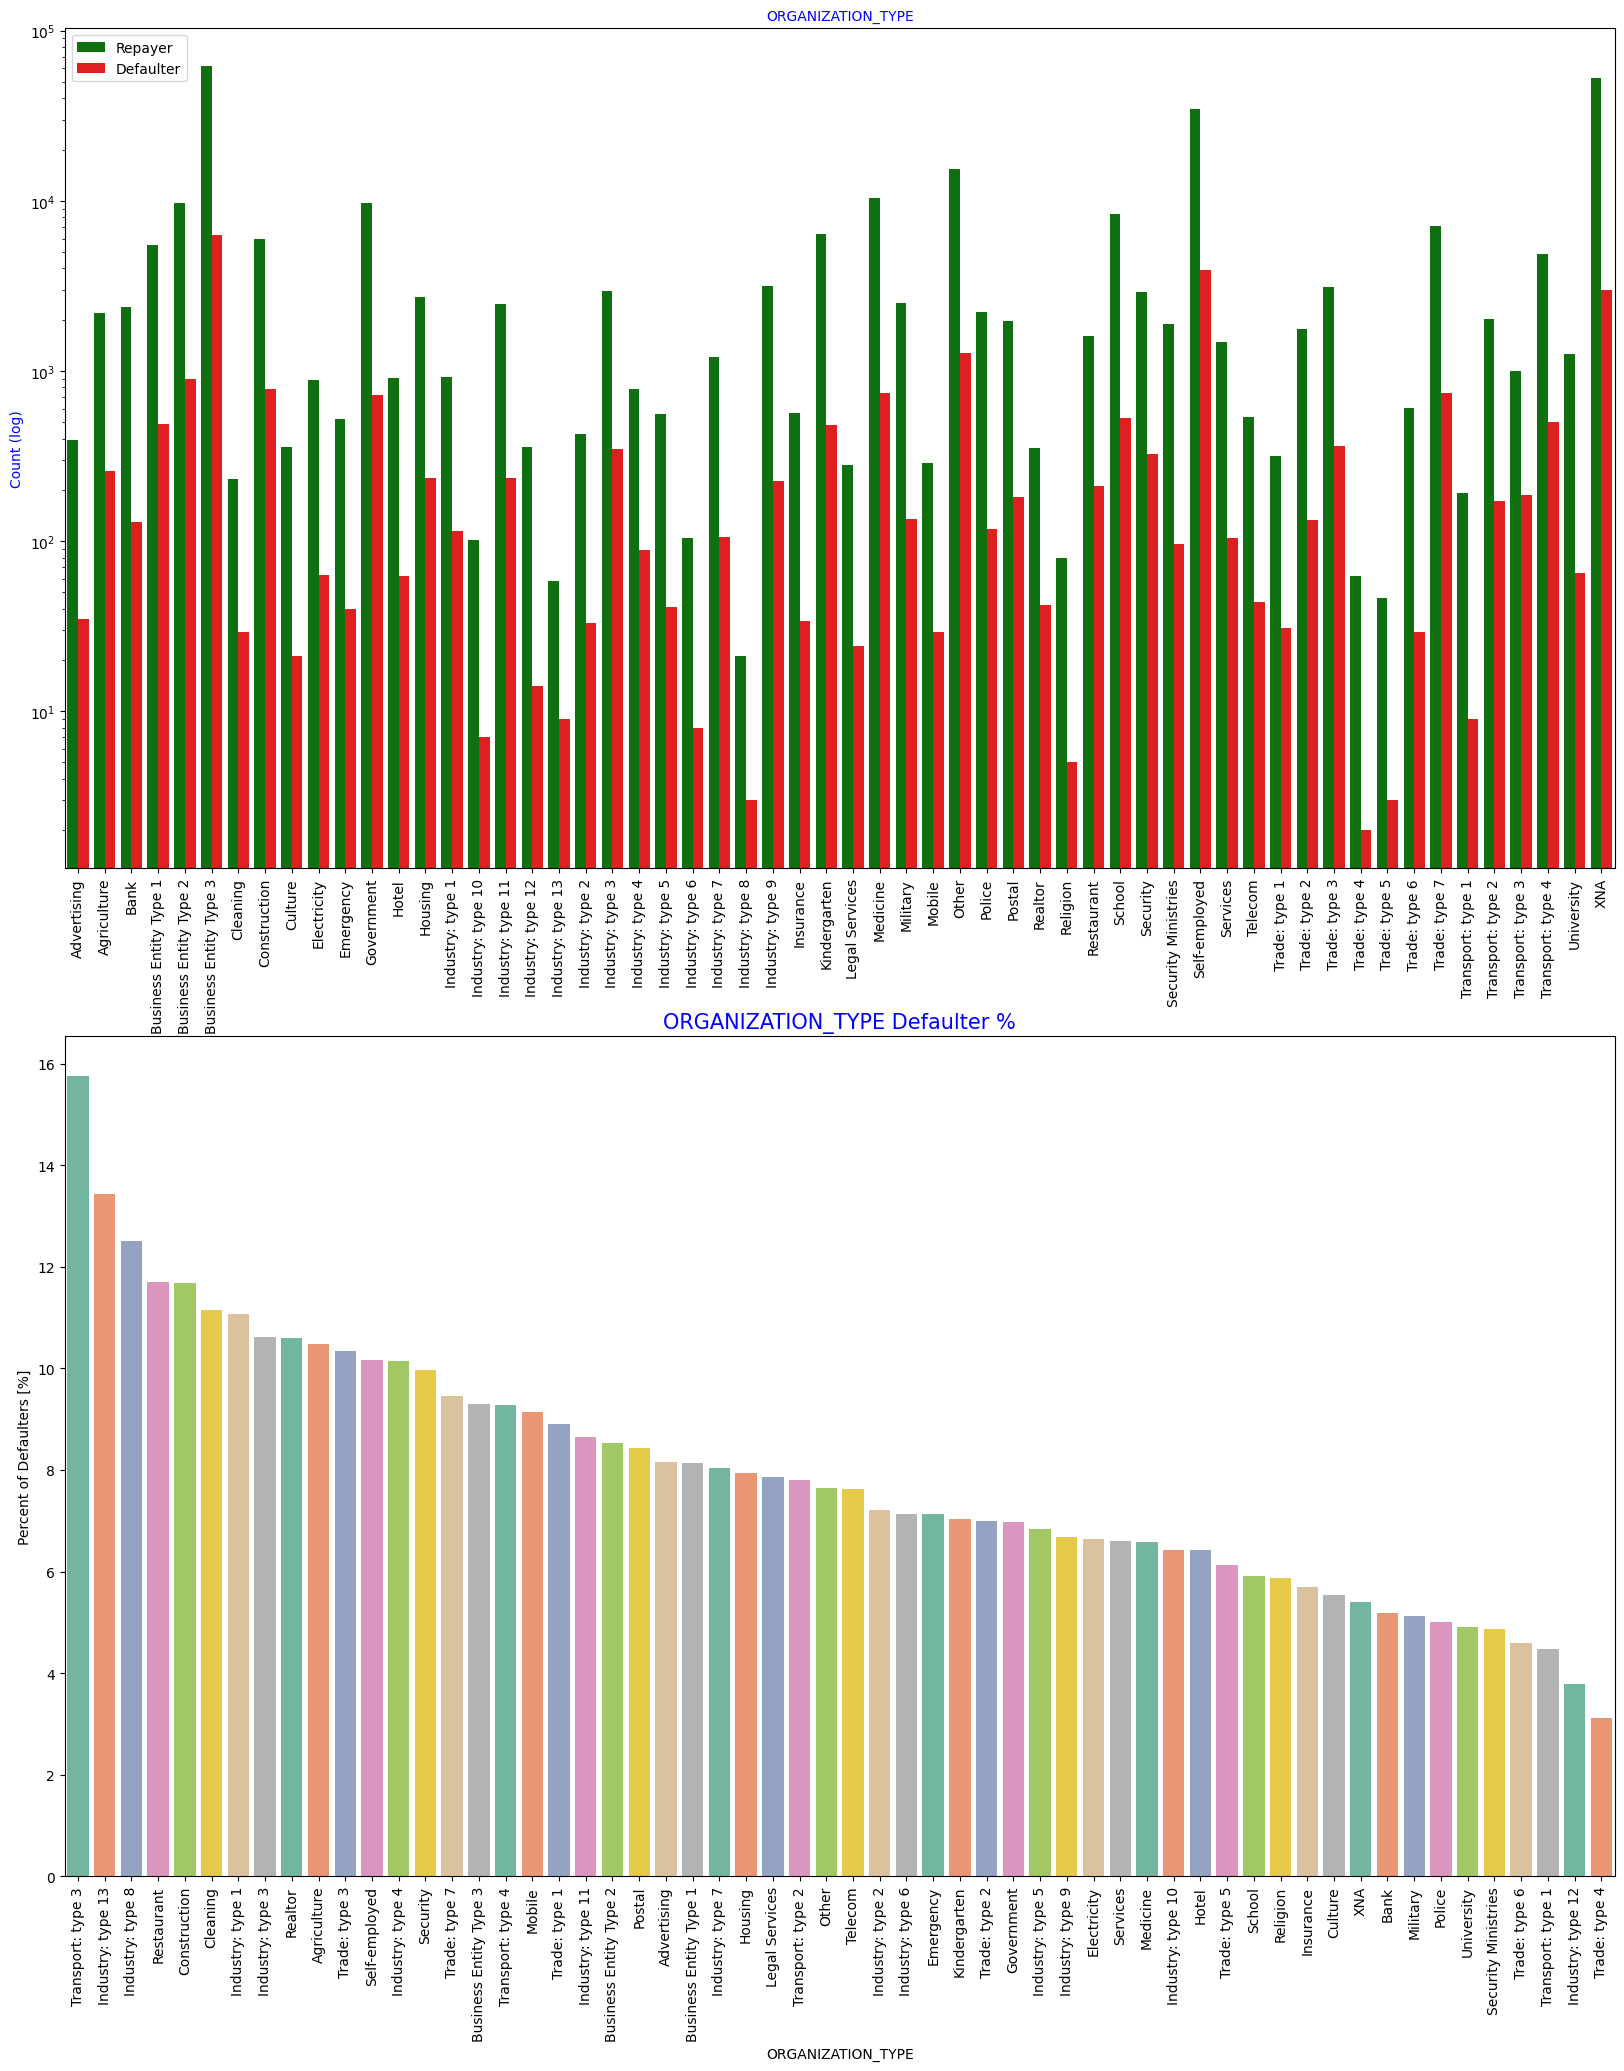

In [188]:
uni_plots('ORGANIZATION_TYPE',True,False,True)

In [189]:
# Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
# Most of the people application for loan are from Business Entity Type 3
# For a very high number of applications, Organization type information is unavailable(XNA)
# Trade Type 4 and 5 and Industry type 8 jave lesser defaulter rates and thus are safer for loans

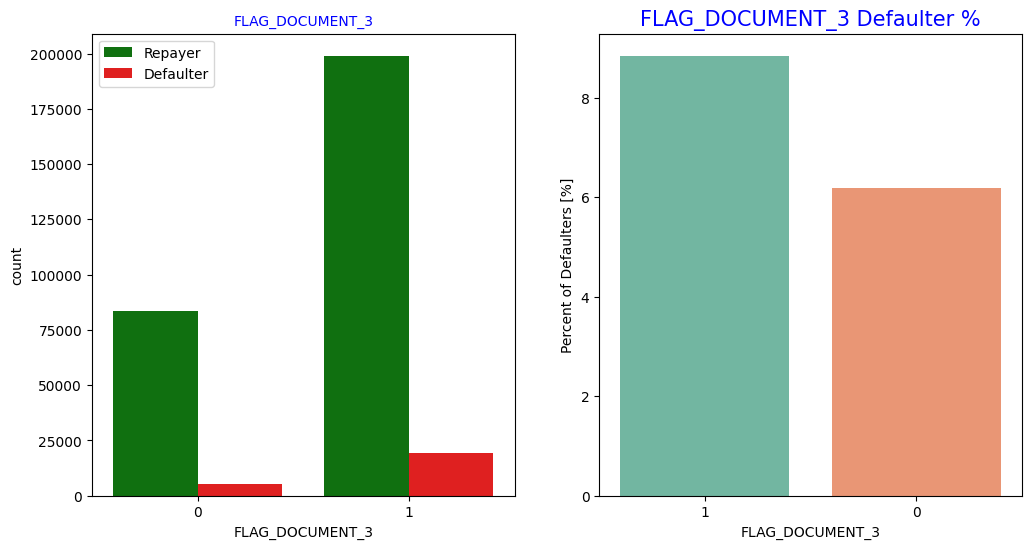

In [190]:
uni_plots('FLAG_DOCUMENT_3')

In [191]:
# if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)

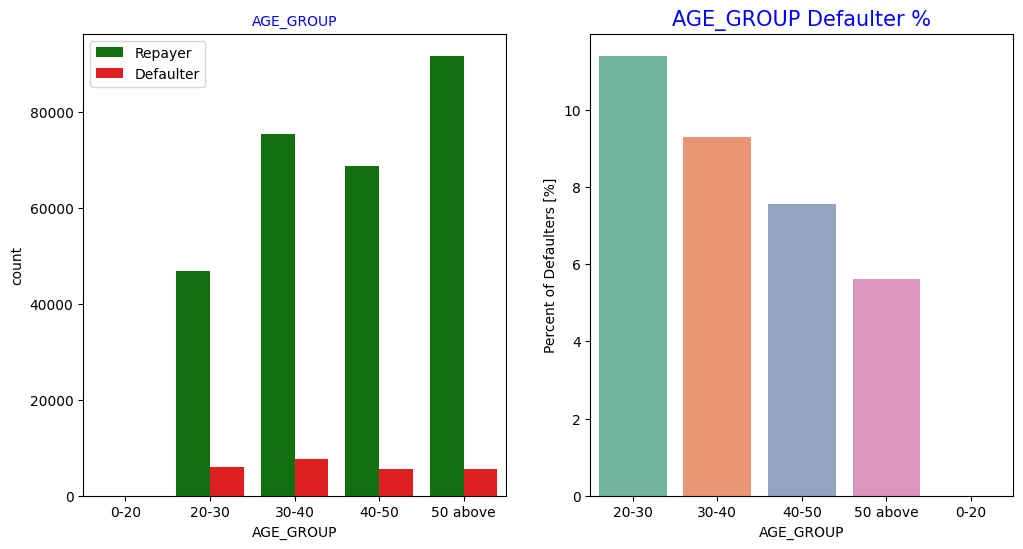

In [192]:
uni_plots('AGE_GROUP')

In [193]:
# People in the age group range 20-40 have higher probability of defaulting
# People above age of 50 have low probability of defailting

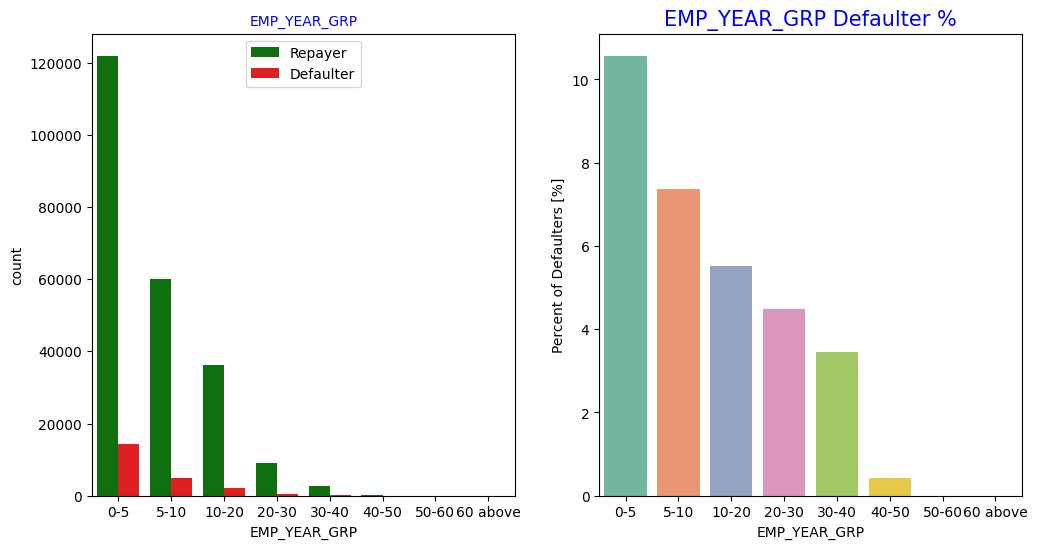

In [195]:
uni_plots('EMP_YEAR_GRP')

In [196]:
# Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%
# With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

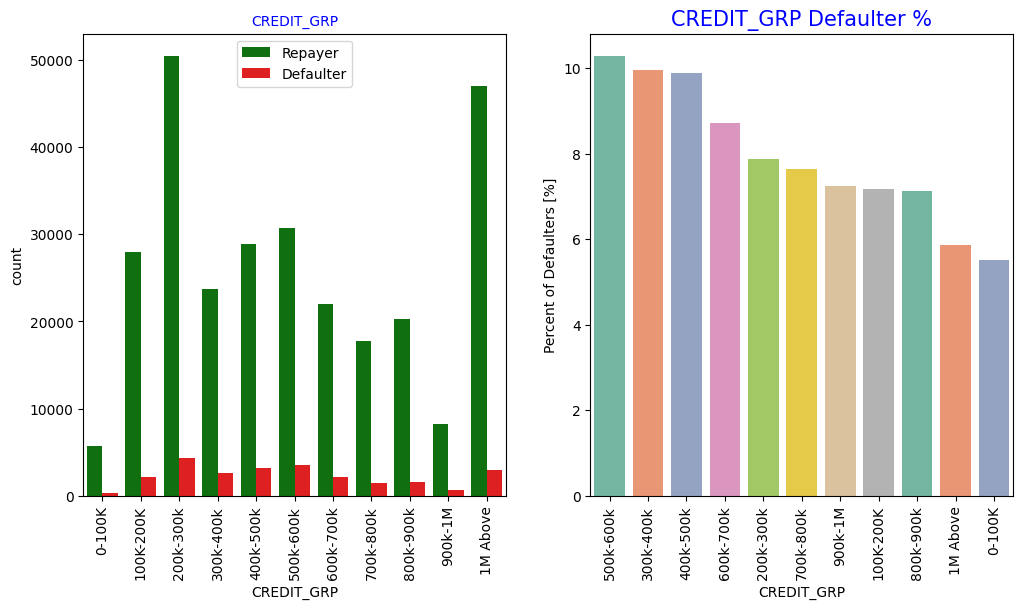

In [199]:
uni_plots('CREDIT_GRP',False,True,True)

In [200]:
# More than 80% of the loan provided are for amount less than 900,000
# People who get loan for 300-600k tend to default more than others.

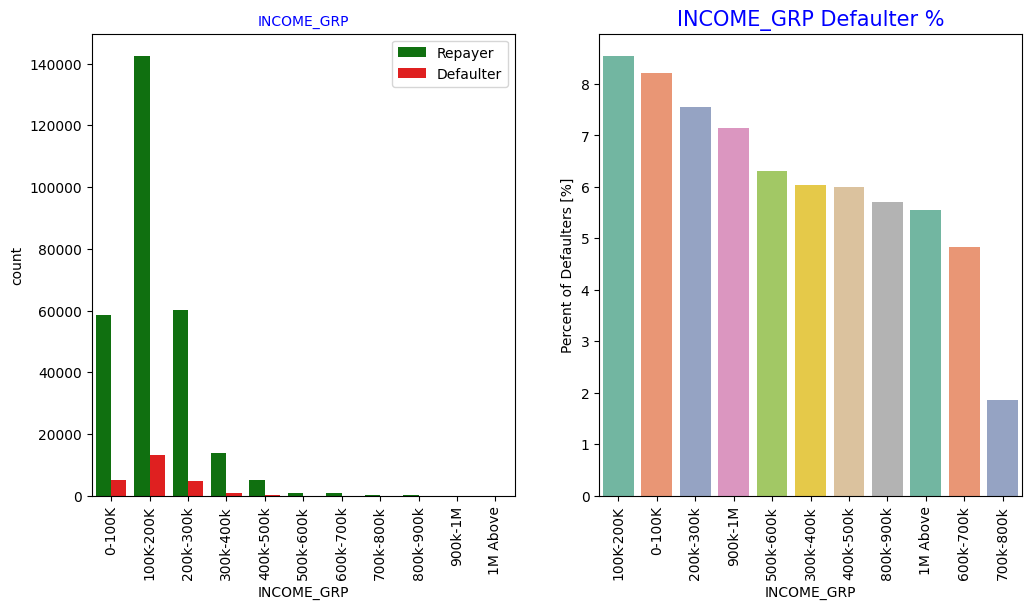

In [202]:
uni_plots('INCOME_GRP',False,True,True)

In [203]:
# 90% of the applications have Income total less than 300,000
# Application with Income less than 300,000 has high probability of defaulting
# Applicant with Income more than 700,000 are less likely to default

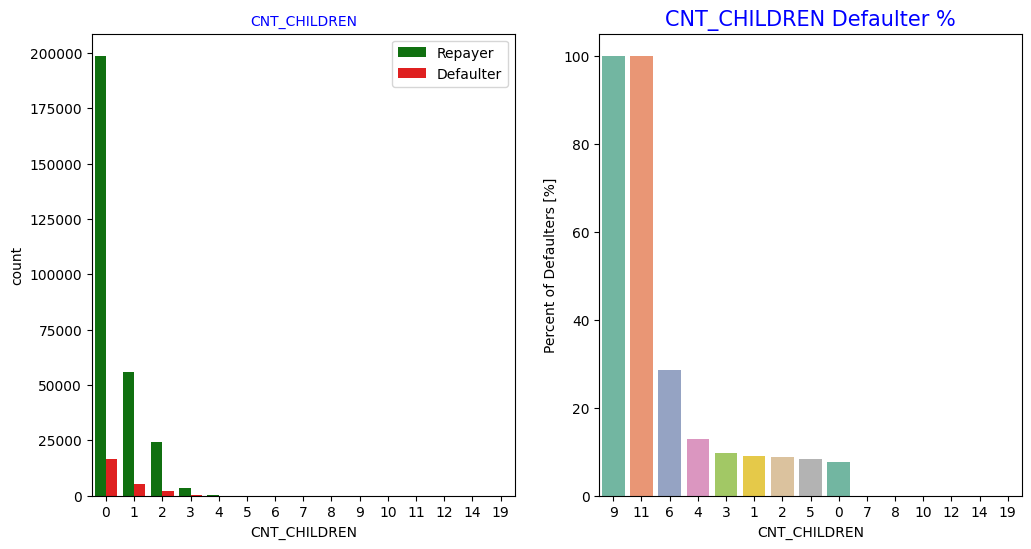

In [204]:
uni_plots('CNT_CHILDREN')

In [205]:
# Most of the applicants do not have children
# Very few clients have more than 3 children.
# Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

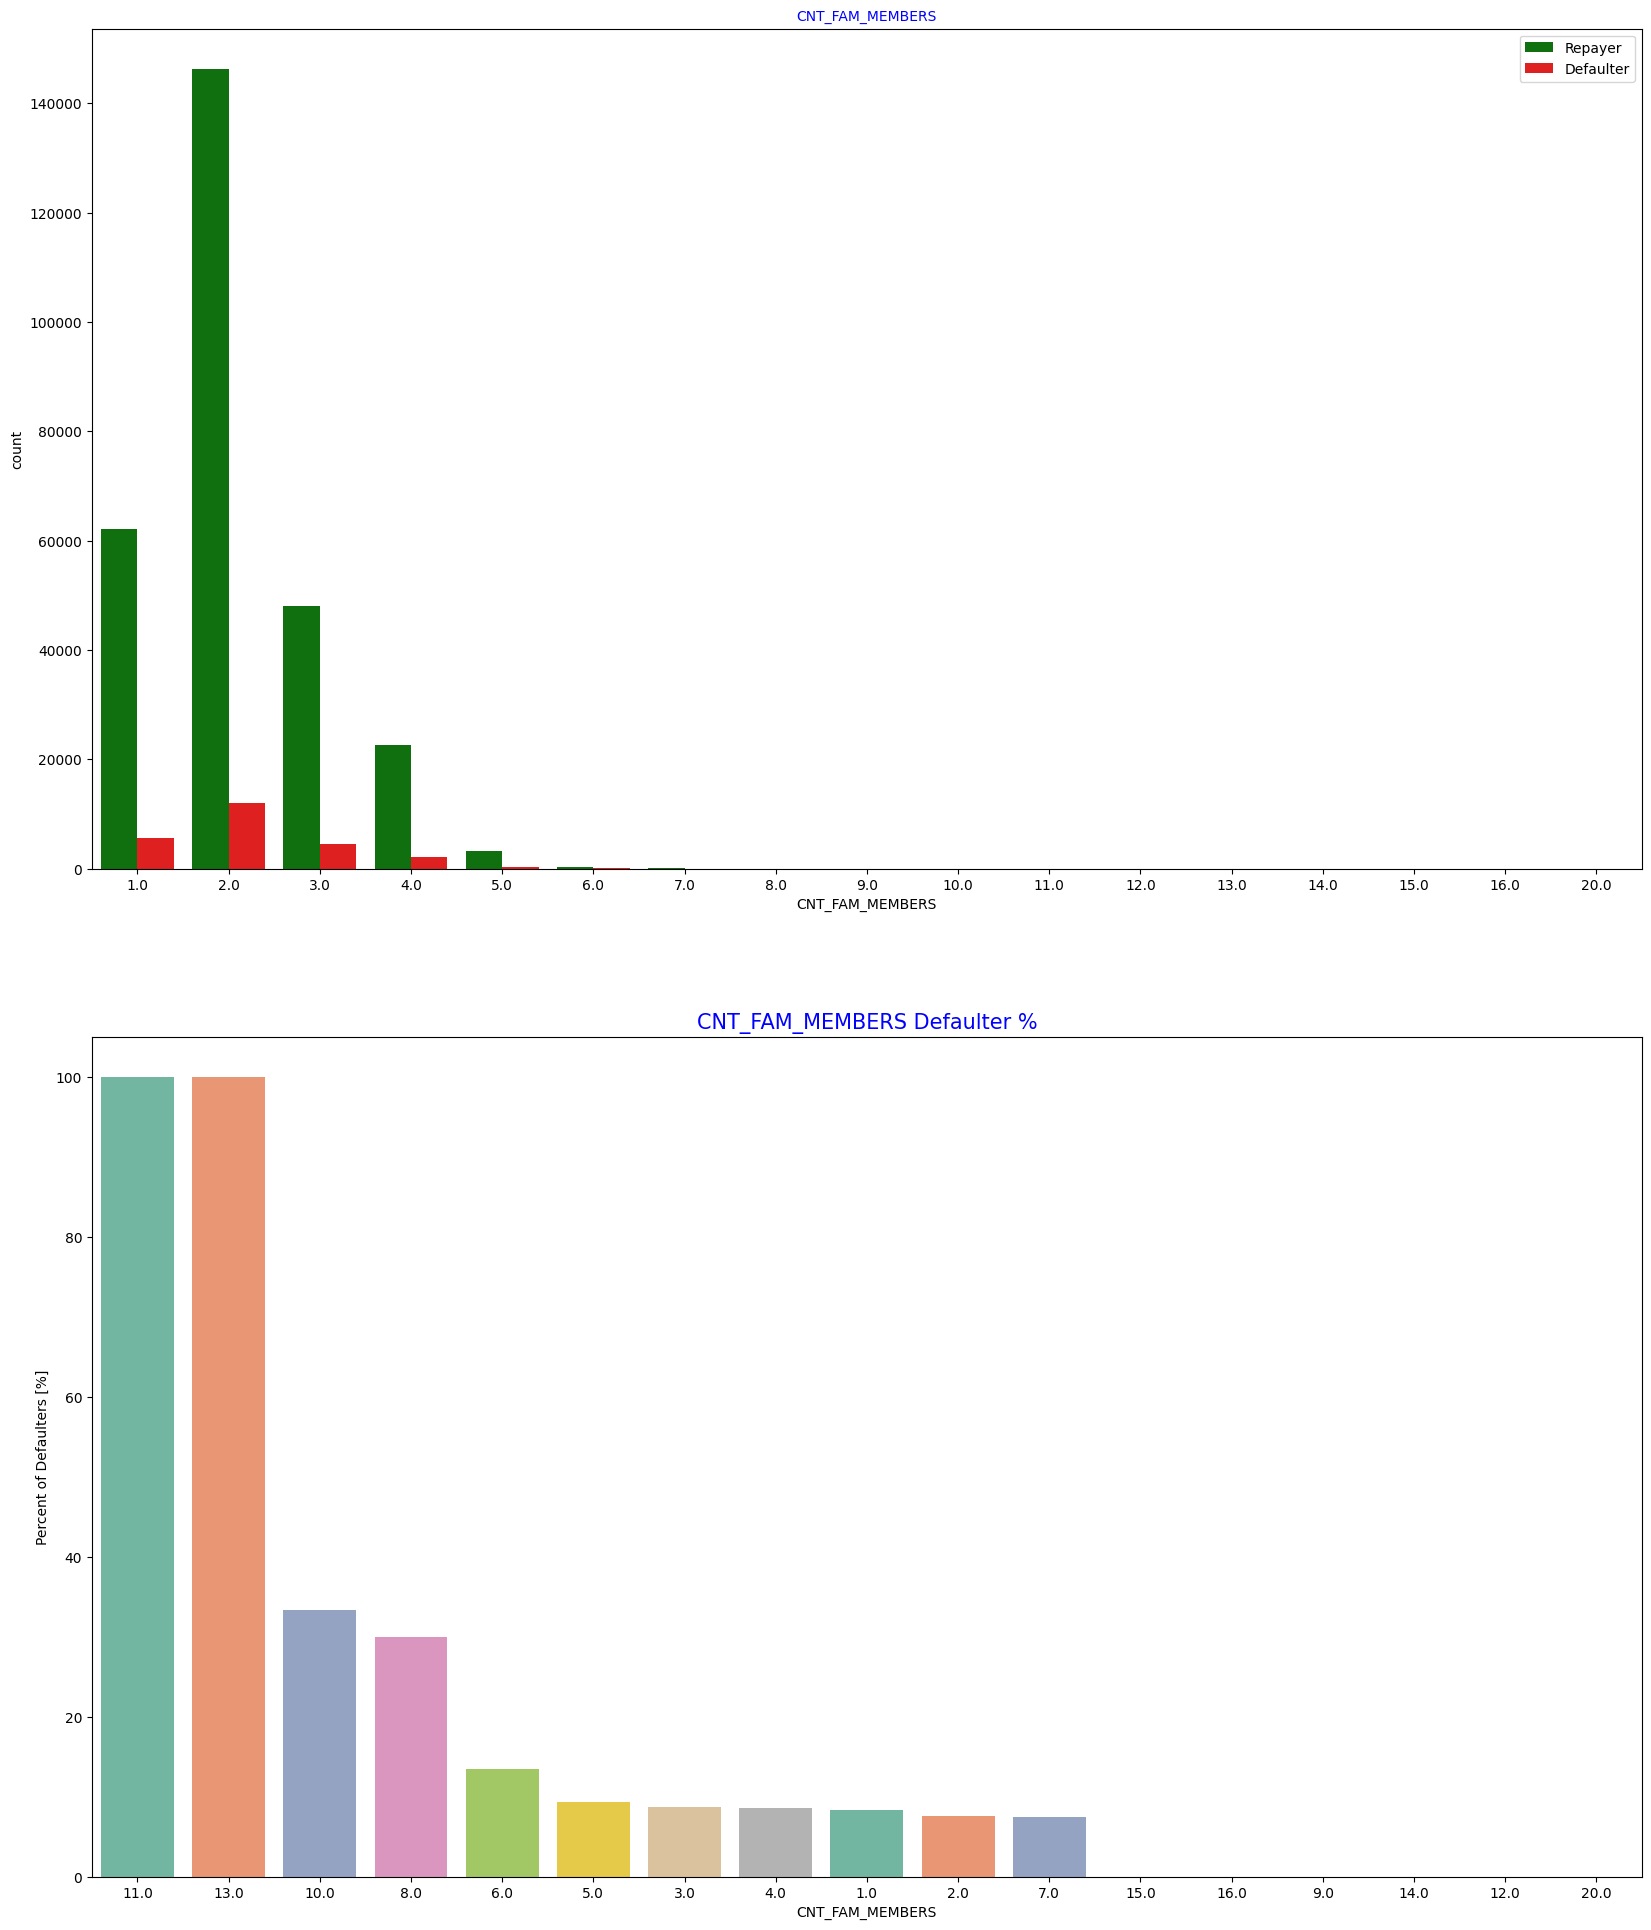

In [207]:
uni_plots('CNT_FAM_MEMBERS',False,False)

In [208]:
# most of the applicants have less than or equal to 4 family members
# people with more family memers are more likely to default

### Numerical analysis

In [209]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [218]:
app_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

repayer_df = app_df.loc[app_df['TARGET']==0, app_cols]
defaulter_df = app_df.loc[app_df['TARGET']==1, app_cols]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\3191451012.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  repcorr = repayer_df.corr()


<AxesSubplot: >

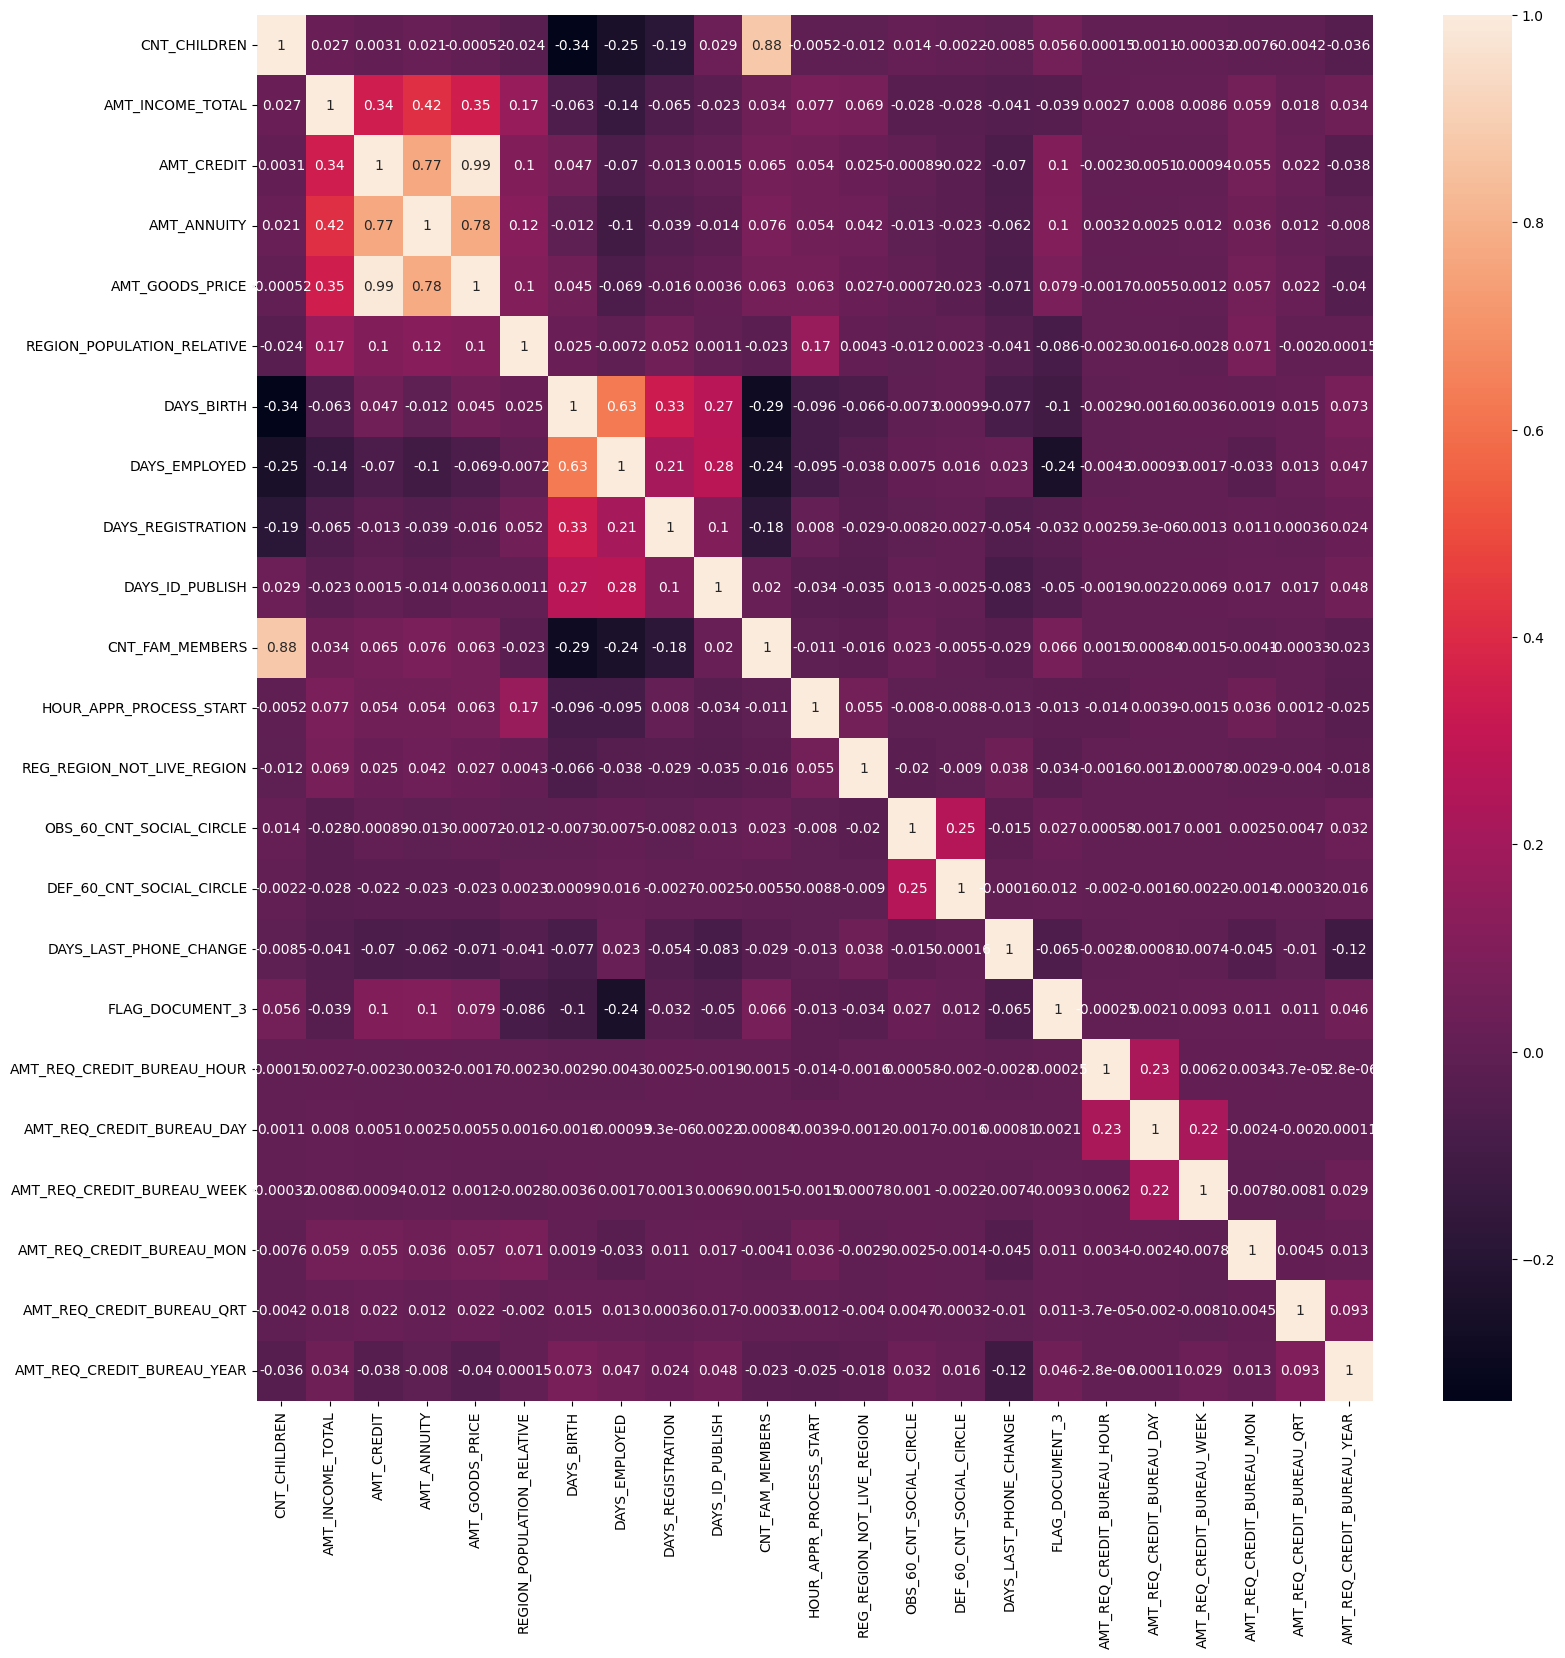

In [219]:
repcorr = repayer_df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(repcorr,annot=True)

In [220]:
# It is a very big heatmap so we take only highly correlated features from this
repcorr = repcorr.where(np.triu(np.ones(repcorr.shape),k=1).astype(np.bool))
repcorr = repcorr.unstack().reset_index()
repcorr.columns =['VAR1','VAR2','Correlation']
repcorr.dropna(subset = ["Correlation"], inplace = True)
repcorr["Correlation"]=repcorr["Correlation"].abs() 
repcorr.sort_values(by='Correlation', ascending=False, inplace=True) 
repcorr.head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\1377930675.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  repcorr = repcorr.where(np.triu(np.ones(repcorr.shape),k=1).astype(np.bool))


,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


In [223]:
# Correlating factors amongst repayers:
# Credit amount is highly correlated with
# amount of goods price
# loan annuity
# total income

In [225]:
dcorr = defaulter_df.corr()
dcorr = dcorr.where(np.triu(np.ones(dcorr.shape),k=1).astype(np.bool))
dcorr = dcorr.unstack().reset_index()
dcorr.columns =['VAR1','VAR2','Correlation']
dcorr.dropna(subset = ["Correlation"], inplace = True)
dcorr["Correlation"]=dcorr["Correlation"].abs() 
dcorr.sort_values(by='Correlation', ascending=False, inplace=True) 
dcorr.head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\703523380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dcorr = defaulter_df.corr()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\703523380.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dcorr = dcorr.where(np.triu(np.ones(dcorr.shape),k=1).astype(np.bool))


,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


In [227]:
# Credit amount is highly correlated with amount of goods price which is same as repayers.
# But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
# We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
# There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\1804130769.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17348\1804130769.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

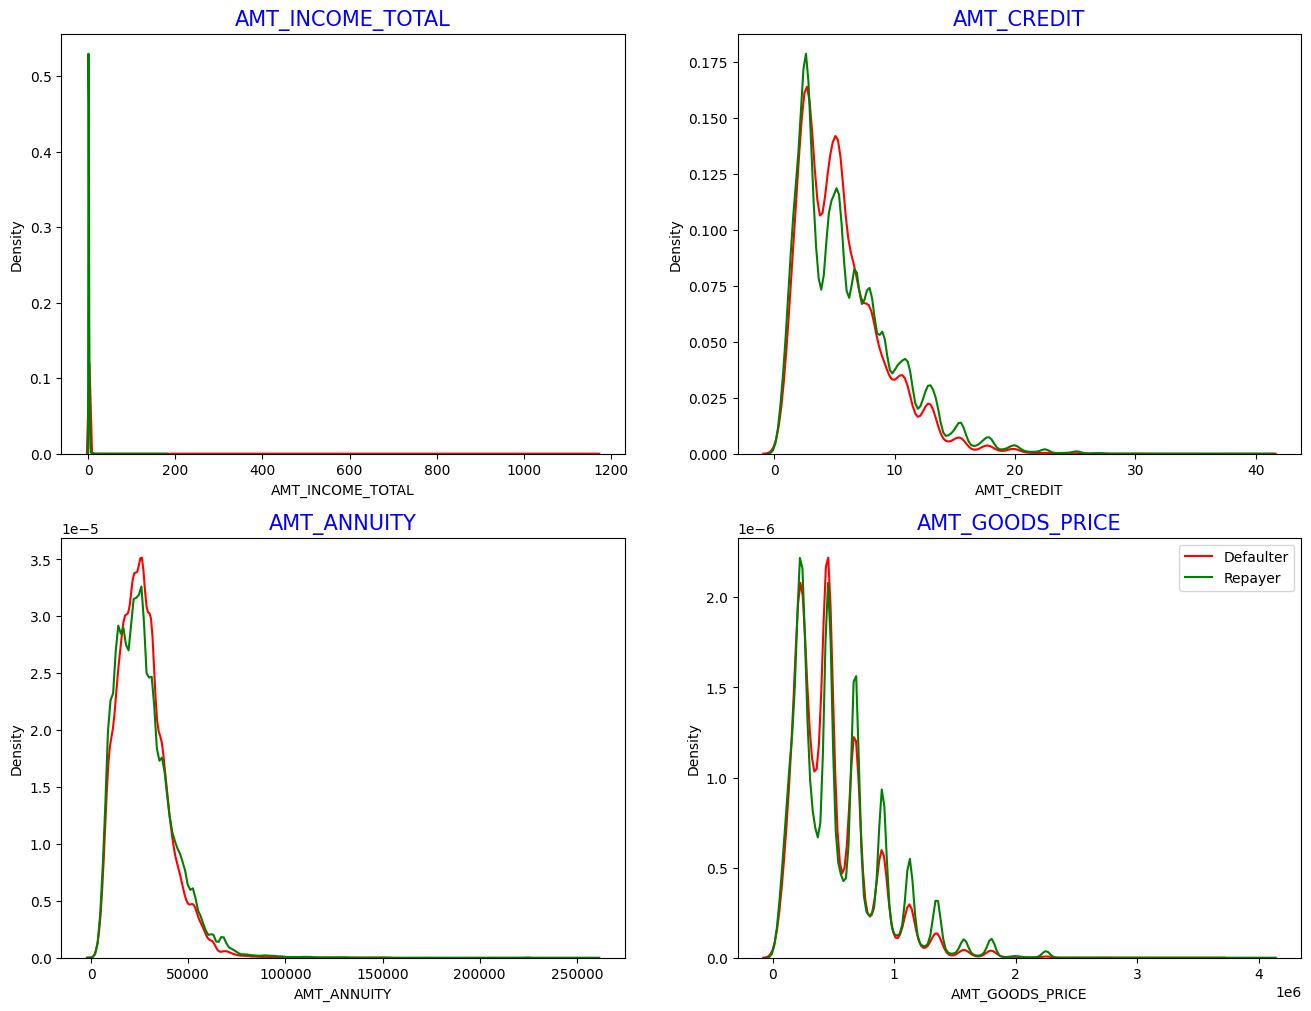

In [228]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = app_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

In [229]:
# Most no of loans are given for goods price below 10 lakhs
# Most people pay annuity below 50000 for the credit loan
# Credit amount of the loan is mostly less then 10 lakhs
# The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision